In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



In [3]:
cho_netbio_pathways = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/NetBio/cho_ssgsea.txt', sep='\t')
cho_netbio_pathways

,testType,Dis_01,Dis_02,Dis_03,Dis_04,Dis_05,Dis_06,Dis_07,Dis_08,Dis_09,Dis_10,Dis_11,Dis_12,Dis_15,Dis_16,Dis_17,Dis_18
0,ABBUD_LIF_SIGNALING_1_DN,0.213075,0.218239,0.229696,0.207319,0.192020,0.185001,0.261091,0.238118,0.208526,0.221473,0.159118,0.184705,0.174767,0.218832,0.213114,0.181378
1,ABBUD_LIF_SIGNALING_1_UP,0.048862,0.170516,0.098179,0.258520,0.164913,0.188253,0.283586,0.120945,0.108050,0.253972,0.074688,0.185363,0.205208,0.238219,0.184173,0.131968
2,ABDELMOHSEN_ELAVL4_TARGETS,0.231636,0.236071,0.223226,0.280566,0.181156,0.219540,0.260350,0.281889,0.227695,0.311228,0.271876,0.235064,0.221011,0.212970,0.220121,0.203947
3,ABE_INNER_EAR,0.162884,0.163043,0.124353,0.126581,0.165360,0.116341,0.157386,0.140235,0.130790,0.178930,0.171370,0.154674,0.164418,0.189803,0.210366,0.100917
4,ABE_VEGFA_TARGETS,0.056205,0.152854,0.150957,0.264438,0.140629,0.095605,0.243654,0.088169,0.123859,0.339519,0.072735,0.137954,0.106646,0.218198,0.169924,0.152688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575,ZWANG_DOWN_BY_2ND_EGF_PULSE,0.103853,0.051346,0.075808,0.047814,0.103077,0.071194,0.014982,0.097551,0.091853,0.033016,0.096691,0.063169,0.059101,0.022903,0.048853,0.085277
4576,ZWANG_EGF_INTERVAL_DN,0.098166,0.131862,0.079272,0.128105,0.140199,0.144832,0.133068,0.121357,0.117622,0.118591,0.111311,0.159752,0.132665,0.158905,0.156090,0.143611
4577,ZWANG_EGF_INTERVAL_UP,0.009428,-0.003321,0.012873,0.010110,0.043711,0.022051,0.005930,0.017465,0.031620,0.010137,0.024895,-0.003585,0.008798,-0.000378,0.007625,0.015772
4578,ZWANG_EGF_PERSISTENTLY_DN,0.136828,0.170692,0.078933,0.185062,0.193815,0.164188,0.148764,0.157147,0.141555,0.119606,0.101160,0.177265,0.170929,0.207044,0.191271,0.174881


In [6]:
# firstly calculate the mean across all samples
cho_netbio_pathways.set_index('testType', inplace=True)
cho_netbio_pathways_population = cho_netbio_pathways.mean(axis=1)
cho_netbio_pathways_population
# then calculate the standard deviation across all samples
#cho_netbio_pathways_population_std = cho_netbio_pathways.std(axis=1)
#cho_netbio_pathways_population_std



testType
ABBUD_LIF_SIGNALING_1_DN       0.206654
ABBUD_LIF_SIGNALING_1_UP       0.169713
ABDELMOHSEN_ELAVL4_TARGETS     0.238647
ABE_INNER_EAR                  0.153591
ABE_VEGFA_TARGETS              0.157127
                                 ...   
ZWANG_DOWN_BY_2ND_EGF_PULSE    0.066655
ZWANG_EGF_INTERVAL_DN          0.129713
ZWANG_EGF_INTERVAL_UP          0.013321
ZWANG_EGF_PERSISTENTLY_DN      0.157446
ZWANG_EGF_PERSISTENTLY_UP      0.142977
Length: 4580, dtype: float64

In [114]:
from scipy.stats import zscore

# then perform z-score normalization
cho_netbio_pathways_zscore = zscore(cho_netbio_pathways_population)
cho_netbio_pathways_zscore = cho_netbio_pathways_zscore.sort_values(ascending=False)
cho_netbio_pathways_zscore


testType
WP_MIRNA_TARGETS_IN_ECM_AND_MEMBRANE_RECEPTORS                                       2.410810
REACTOME_ANTIGEN_PRESENTATION_FOLDING_ASSEMBLY_AND_PEPTIDE_LOADING_OF_CLASS_I_MHC    2.399813
HOLLEMAN_VINCRISTINE_RESISTANCE_ALL_DN                                               2.245827
REACTOME_DOWNREGULATION_OF_SMAD2_3_SMAD4_TRANSCRIPTIONAL_ACTIVITY                    2.199382
TIEN_INTESTINE_PROBIOTICS_6HR_UP                                                     2.171708
                                                                                       ...   
REACTOME_DEFENSINS                                                                  -4.802820
WEBER_METHYLATED_ICP_IN_FIBROBLAST                                                  -4.991809
REACTOME_BETA_DEFENSINS                                                             -5.009884
KEGG_OLFACTORY_TRANSDUCTION                                                         -5.241853
REACTOME_OLFACTORY_SIGNALING_PATHWAY               

In [118]:
cho_netbio_pathways_zscore_ranked = cho_netbio_pathways_zscore[cho_netbio_pathways_zscore>2]
cho_netbio_pathways_zscore_ranked

testType
WP_MIRNA_TARGETS_IN_ECM_AND_MEMBRANE_RECEPTORS                                       2.410810
REACTOME_ANTIGEN_PRESENTATION_FOLDING_ASSEMBLY_AND_PEPTIDE_LOADING_OF_CLASS_I_MHC    2.399813
HOLLEMAN_VINCRISTINE_RESISTANCE_ALL_DN                                               2.245827
REACTOME_DOWNREGULATION_OF_SMAD2_3_SMAD4_TRANSCRIPTIONAL_ACTIVITY                    2.199382
TIEN_INTESTINE_PROBIOTICS_6HR_UP                                                     2.171708
IIZUKA_LIVER_CANCER_PROGRESSION_G1_G2_DN                                             2.160433
REACTOME_RHO_GTPASES_ACTIVATE_ROCKS                                                  2.144554
ABRAMSON_INTERACT_WITH_AIRE                                                          2.098871
REACTOME_RHO_GTPASES_ACTIVATE_PAKS                                                   2.084689
FARMER_BREAST_CANCER_CLUSTER_4                                                       2.080678
HOLLEMAN_ASPARAGINASE_RESISTANCE_B_ALL_UP          

In [ ]:
from scipy.stats import zscore

cho_netbio_pathways_permutation = 

In [12]:
cho_clinical = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/bulk_RNA-seq/raw_count_final/cho_et_al_clinical.tsv', sep='\t')
cho_clinical

,ID,Sentrix_ID,Sentrix_Position,Age,Sex,Histology,PD-L1expression,Responsiveness,Immunotherapy_drug,Progression_free_survival(month),Overall_survival(months),Best_response,response_binary
0,Dis_01,2.019600e+11,R08C01,72,M,Squamous_cell_carcinoma,No,Non-responder,Nivolumab,0.5,1.1,PD,0
1,Dis_02,2.014380e+11,R03C01,76,M,Squamous_cell_carcinoma,Yes,Responder,Nivolumab,13.8,14.1,PR,1
2,Dis_03,2.019600e+11,R01C01,65,M,Squamous_cell_carcinoma,NaN,Non-responder,Nivolumab,2.3,11.2,PD,0
3,Dis_04,2.014140e+11,R07C01,55,F,Adenocarcinoma,Yes,Responder,Nivolumab,13.5,18.7,PR,1
4,Dis_05,2.014140e+11,R03C01,72,M,Adenocarcinoma,No,Non-responder,Nivolumab,2.8,9.6,PD,0
5,Dis_06,2.014140e+11,R01C01,54,M,Adenocarcinoma,No,Non-responder,Nivolumab,0.8,0.8,PD,0
6,Dis_07,2.019600e+11,R04C01,66,M,Squamous_cell_carcinoma,No,Non-responder,Nivolumab,1.1,3.5,PD,0
7,Dis_08,2.014140e+11,R05C01,34,F,Adenocarcinoma,No,Non-responder,Nivolumab,1.0,1.0,PD,0
8,Dis_09,2.014140e+11,R02C01,61,M,Squamous_cell_carcinoma,NaN,Non-responder,Nivolumab,0.7,1.0,PD,0
9,Dis_10,2.019600e+11,R06C01,75,M,Squamous_cell_carcinoma,Yes,Responder,Nivolumab,14.2,14.2,PR,1


In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from statsmodels.stats.multitest import multipletests


def permutation_test_consistency(
        importance_df,
        n_perm=1000,
        agg="mean",
        random_state=42
    ):
    """
    Permutation test for sample-level feature importance consistency.
    Shuffles importance across samples (not labels).
    """

    np.random.seed(random_state)
    features = importance_df.columns
    observed = importance_df.agg(agg, axis=0).values  # mean/median importance
    n_features = len(features)
    null_dist = np.zeros((n_perm, n_features))
    # Perform z-score normalization across samples (columns) for each feature (row)
    observed_zscore = (observed.sub(observed.mean(), axis=0)).div(observed.std(axis=1, ddof=0), axis=0)
    # Use the normalized importance values for the permutation test
    
    for i in tqdm(range(n_perm), desc="Permutation testing"):
        permuted = importance_df.apply(np.random.permutation)
        null_dist[i, :] = permuted.agg(agg, axis=0).values

    # Compute empirical p-values
    pvals = [
        (np.sum(null_dist[:, j] >= observed[j]) + 1) / (n_perm + 1)
        for j in range(n_features)
    ]
    # FDR correction
    _, pvals_fdr, _, _ = multipletests(pvals, method='fdr_bh')

    return pd.DataFrame({
        "feature": features,
        "observed_importance": observed,
        "p_value": pvals,
        "FDR": pvals_fdr,
        "direction": np.sign(observed)
    }).sort_values("p_value")


In [22]:
cho_clinical = cho_clinical[cho_clinical["ID"].isin(cho_netbio_pathways.columns)]

In [23]:
cho_clinical.shape

(16, 13)

In [101]:
results_df_cho_netbio_pathways_mean = permutation_test_consistency(cho_netbio_pathways.T)

Permutation testing: 100%|██████████| 1000/1000 [01:05<00:00, 15.21it/s]


In [102]:
results_df_cho_netbio_pathways_mean

,feature,observed_importance,p_value,FDR,direction
0,ABBUD_LIF_SIGNALING_1_DN,0.206654,0.000999,0.001868,1.0
2564,REACTOME_DISEASES_ASSOCIATED_WITH_GLYCOSAMINOG...,0.192582,0.000999,0.001868,1.0
2567,REACTOME_DISEASES_ASSOCIATED_WITH_O_GLYCOSYLAT...,0.134887,0.000999,0.001868,1.0
2569,REACTOME_DISEASES_OF_GLYCOSYLATION,0.192069,0.000999,0.001868,1.0
2570,REACTOME_DISEASES_OF_IMMUNE_SYSTEM,0.208204,0.000999,0.001868,1.0
...,...,...,...,...,...
2774,REACTOME_INTERLEUKIN_2_FAMILY_SIGNALING,0.226161,1.000000,1.000000,1.0
2775,REACTOME_INTERLEUKIN_37_SIGNALING,0.261571,1.000000,1.000000,1.0
2776,REACTOME_INTERLEUKIN_3_INTERLEUKIN_5_AND_GM_CS...,0.309383,1.000000,1.000000,1.0
2768,REACTOME_INTERLEUKIN_12_FAMILY_SIGNALING,0.280061,1.000000,1.000000,1.0


In [106]:
results_df_cho_netbio_pathways_mean_top  = results_df_cho_netbio_pathways_mean[results_df_cho_netbio_pathways_mean["FDR"] < 0.002]
results_df_cho_netbio_pathways_mean_top = results_df_cho_netbio_pathways_mean_top[results_df_cho_netbio_pathways_mean_top["direction"] == 1]
results_df_cho_netbio_pathways_mean_top


,feature,observed_importance,p_value,FDR,direction
0,ABBUD_LIF_SIGNALING_1_DN,0.206654,0.000999,0.001868,1.0
2564,REACTOME_DISEASES_ASSOCIATED_WITH_GLYCOSAMINOG...,0.192582,0.000999,0.001868,1.0
2567,REACTOME_DISEASES_ASSOCIATED_WITH_O_GLYCOSYLAT...,0.134887,0.000999,0.001868,1.0
2569,REACTOME_DISEASES_OF_GLYCOSYLATION,0.192069,0.000999,0.001868,1.0
2570,REACTOME_DISEASES_OF_IMMUNE_SYSTEM,0.208204,0.000999,0.001868,1.0
...,...,...,...,...,...
1402,KEGG_STARCH_AND_SUCROSE_METABOLISM,0.036777,0.000999,0.001868,1.0
107,BEIER_GLIOMA_STEM_CELL_DN,0.197957,0.000999,0.001868,1.0
1365,KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS,0.082001,0.000999,0.001868,1.0
1397,KEGG_SELENOAMINO_ACID_METABOLISM,0.160784,0.000999,0.001868,1.0


In [41]:
# we need to try the same for a gene related pattern 
cho_compass_genes = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/COMPASS/cho_dfgn.csv')
cho_compass_genes

,Index,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,Dis_01,0.152600,1.149913,0.536378,-0.768001,1.129888,0.427289,0.013039,-0.243757,0.902499,...,0.837500,-0.236092,-0.076346,0.688780,0.455095,0.450441,0.374742,-0.472952,0.336491,0.183482
1,Dis_02,0.194631,1.148926,0.530228,-0.925803,1.165508,0.443019,0.009771,-0.341532,0.892962,...,0.604213,0.028344,-0.037657,0.875715,0.450878,0.422639,0.357990,-0.543072,0.336578,0.190623
2,Dis_11,0.175505,1.149134,0.531184,-0.724886,1.042055,0.431826,0.011193,-0.425529,0.903055,...,0.715399,0.000320,-0.002510,0.721477,0.445871,0.482390,0.368538,-0.529598,0.326350,0.188239
3,Dis_12,0.193852,1.149903,0.531674,-0.452029,1.238413,0.448586,0.009507,-0.297551,0.881169,...,0.718726,0.068679,-0.013331,0.675886,0.454783,0.463502,0.362233,-0.541740,0.335448,0.195233
4,Dis_15,0.201297,1.146482,0.527107,-0.805611,1.156071,0.496096,0.008306,-0.234208,0.882749,...,0.639969,0.196881,0.084778,0.635781,0.453749,0.361729,0.330432,-0.561849,0.329959,0.190203
5,Dis_04,0.198983,1.152727,0.531943,-0.913485,1.071180,0.479087,0.012221,-0.104336,0.906067,...,0.576842,0.321629,-0.027922,0.754233,0.443224,0.300353,0.351857,-0.563413,0.335520,0.217619
6,Dis_16,0.130555,1.151911,0.534862,-0.938781,1.193636,0.431420,0.012177,-0.273244,0.905431,...,0.636611,0.046319,-0.043692,0.652255,0.434970,0.431456,0.439170,-0.560290,0.337301,0.219947
7,Dis_17,0.214287,1.149969,0.522479,-0.867951,1.236417,0.432075,0.010142,-0.229218,0.895277,...,0.579127,0.320528,0.182117,0.600603,0.454946,0.317087,0.374340,-0.557957,0.330441,0.196474
8,Dis_03,0.217166,1.145000,0.535661,-0.868314,1.128530,0.472750,0.007755,-0.202926,0.893621,...,0.744268,-0.056802,0.130576,0.636844,0.440604,0.321844,0.435802,-0.504004,0.328325,0.188181
9,Dis_07,0.202267,1.151800,0.525253,-0.921829,1.148959,0.436328,0.011182,-0.169254,0.901207,...,0.510250,0.271586,-0.042185,0.743745,0.431048,0.290774,0.392897,-0.537809,0.338287,0.201671


In [44]:
cho_compass_genes.index = cho_compass_genes["Index"]
cho_compass_genes.drop(columns=["Index"], inplace=True)

In [45]:
cho_compass_genes

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADAT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Index,,,,,,,,,,,,,,,,,,,,,
Dis_01,0.152600,1.149913,0.536378,-0.768001,1.129888,0.427289,0.013039,-0.243757,0.902499,0.409798,...,0.837500,-0.236092,-0.076346,0.688780,0.455095,0.450441,0.374742,-0.472952,0.336491,0.183482
Dis_02,0.194631,1.148926,0.530228,-0.925803,1.165508,0.443019,0.009771,-0.341532,0.892962,0.060334,...,0.604213,0.028344,-0.037657,0.875715,0.450878,0.422639,0.357990,-0.543072,0.336578,0.190623
Dis_11,0.175505,1.149134,0.531184,-0.724886,1.042055,0.431826,0.011193,-0.425529,0.903055,0.446914,...,0.715399,0.000320,-0.002510,0.721477,0.445871,0.482390,0.368538,-0.529598,0.326350,0.188239
Dis_12,0.193852,1.149903,0.531674,-0.452029,1.238413,0.448586,0.009507,-0.297551,0.881169,0.184961,...,0.718726,0.068679,-0.013331,0.675886,0.454783,0.463502,0.362233,-0.541740,0.335448,0.195233
Dis_15,0.201297,1.146482,0.527107,-0.805611,1.156071,0.496096,0.008306,-0.234208,0.882749,0.088811,...,0.639969,0.196881,0.084778,0.635781,0.453749,0.361729,0.330432,-0.561849,0.329959,0.190203
Dis_04,0.198983,1.152727,0.531943,-0.913485,1.071180,0.479087,0.012221,-0.104336,0.906067,-0.104836,...,0.576842,0.321629,-0.027922,0.754233,0.443224,0.300353,0.351857,-0.563413,0.335520,0.217619
Dis_16,0.130555,1.151911,0.534862,-0.938781,1.193636,0.431420,0.012177,-0.273244,0.905431,0.130918,...,0.636611,0.046319,-0.043692,0.652255,0.434970,0.431456,0.439170,-0.560290,0.337301,0.219947
Dis_17,0.214287,1.149969,0.522479,-0.867951,1.236417,0.432075,0.010142,-0.229218,0.895277,0.293390,...,0.579127,0.320528,0.182117,0.600603,0.454946,0.317087,0.374340,-0.557957,0.330441,0.196474
Dis_03,0.217166,1.145000,0.535661,-0.868314,1.128530,0.472750,0.007755,-0.202926,0.893621,0.413239,...,0.744268,-0.056802,0.130576,0.636844,0.440604,0.321844,0.435802,-0.504004,0.328325,0.188181


In [120]:
cho_compass_genes_population = cho_compass_genes.mean(axis=0)
cho_compass_genes_population


A1BG      0.193090
A1CF      1.149389
A2M       0.530814
A2ML1    -0.801985
A4GALT    1.151181
            ...   
ZYG11A    0.393955
ZYG11B    0.364985
ZYX      -0.540551
ZZEF1     0.332318
ZZZ3      0.196794
Length: 15672, dtype: float64

In [122]:
cho_compass_genes_zscore = zscore(cho_compass_genes_population)
cho_compass_genes_zscore = cho_compass_genes_zscore.sort_values(ascending=False)
cho_compass_genes_zscore

KLRB1       3.420150
CMTM5       3.029590
SLC35E2B    2.992316
NRP2        2.990041
MEIS1       2.971046
              ...   
NPY1R      -3.236507
DPF3       -3.241364
ALK        -3.274523
TUBGCP2    -3.334051
CYBB       -3.461081
Length: 15672, dtype: float64

In [125]:
cho_compass_genes_zscore_ranked = cho_compass_genes_zscore[cho_compass_genes_zscore>2]
cho_compass_genes_zscore_ranked

KLRB1       3.420150
CMTM5       3.029590
SLC35E2B    2.992316
NRP2        2.990041
MEIS1       2.971046
              ...   
UFM1        2.007587
RAB24       2.006348
P2RX1       2.004891
SETBP1      2.004463
FBXO42      2.001245
Length: 296, dtype: float64

In [157]:
def get_important_features(importance_genes, z_threshold): 
    importance_genes_population = importance_genes.mean(axis=0)
    importance_genes_population_zscore = zscore(importance_genes_population)
    importance_genes_population_zscore = importance_genes_population_zscore.sort_values(ascending=False)
    #print(importance_genes_population_zscore)
    importance_genes_population_zscore_ranked = importance_genes_population_zscore[importance_genes_population_zscore>z_threshold]
    return importance_genes_population_zscore_ranked


In [170]:
podd_compass_genes = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/COMPASS/podd_dfgn.csv')
podd_compass_genes.index = podd_compass_genes["Index"]
podd_compass_genes.drop(columns=["Index"], inplace=True)
podd_compass_genes_top = get_important_features(podd_compass_genes,2)
podd_compass_genes_top


CMTM5     3.296224
MEIS1     3.110998
NRP2      3.012072
IFNA6     2.967806
EMX1      2.946747
            ...   
P2RX1     2.010482
UMPS      2.009804
FCHSD2    2.009205
PDZD8     2.008727
NXPH4     2.002398
Length: 295, dtype: float64

In [190]:
ribas_compass_genes = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/COMPASS/ribas_dfgn.csv')
ribas_compass_genes.index = ribas_compass_genes["Index"]
ribas_compass_genes.drop(columns=["Index"], inplace=True)
ribas_compass_genes_top = get_important_features(ribas_compass_genes,2)
ribas_compass_genes_top

NRP2        3.092967
SDR16C5     3.058886
VWF         3.034434
SLC35E2B    3.031005
EMX1        3.000453
              ...   
HEMK1       2.003370
C3orf38     2.003260
CYP2R1      2.002549
TAF4B       2.002399
USP1        2.000591
Length: 293, dtype: float64

In [188]:
podd_compass_genes_top.to_csv('podd_compass_genes_top.csv')
cho_compass_genes_zscore_ranked.to_csv('cho_compass_genes_top.csv')
ribas_compass_genes_top.to_csv('ribas_compass_genes_top.csv')

In [162]:
# similarly, run the same for tres
gondal_tres_genes = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/TRES/Gondal_Tres_evaluation.common_genes.csv')
gondal_tres_genes.index = gondal_tres_genes.iloc[:,0]
gondal_tres_genes = gondal_tres_genes.iloc[:, 1:]
gondal_tres_genes.drop(columns=["Tres"], inplace=True)
gondal_tres_genes_ranked = get_important_features(gondal_tres_genes.T, 2)

#gondal_tres_genes_top
gondal_tres_genes_ranked


Unnamed: 0
RPS23      16.337409
RPS28      15.113730
RPL32      13.474538
JUNB       10.692349
RPL9       10.660076
             ...    
RPL23A      2.032466
IFI16       2.010951
ARPC2       2.010951
XRCC6       2.000193
ATP6V1F     2.000193
Length: 155, dtype: float64

In [164]:
# similarly, run the same for tres
franken_tres_genes = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/TRES/Franken_Tres_evaluation.common_genes.csv')
franken_tres_genes.index = franken_tres_genes.iloc[:,0]
franken_tres_genes = franken_tres_genes.iloc[:, 1:]

franken_tres_genes.drop(columns=["Tres"], inplace=True)

franken_tres_genes_ranked = get_important_features(franken_tres_genes.T, 3)

franken_tres_genes_ranked


Unnamed: 0
FTL       32.429472
EEF1A1    20.293970
RPL28     18.122473
RPL18A    14.404350
RPS18     14.293230
TMSB10    13.594280
TPT1      13.021575
S100A6    12.148029
RPL18     11.082072
RPS4X     10.733827
RPS27A    10.011875
RPS7       8.805959
RPL30      7.901168
SAT1       7.590147
HLA-B      7.085443
EIF1       6.897416
RPS9       6.877765
RPL35      6.754205
RPL39      6.698080
ACTG1      6.445021
RPL36      6.003229
NACA       5.839943
FTH1       5.653330
RPS27      5.485095
RPS15      5.455407
MT2A       5.274448
H3F3A      4.680256
MYL6       4.437517
NFKBIA     4.282006
IFITM3     4.267869
RPL19      4.098221
IFITM2     3.870610
RPL37      3.244325
HLA-A      3.228067
dtype: float64

In [168]:
# similarly, run the same for tres
luoma_tres_genes = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/TRES/Luoma_Tres_evaluation.common_genes.csv')
luoma_tres_genes.index = luoma_tres_genes.iloc[:,0]
luoma_tres_genes = luoma_tres_genes.iloc[:, 1:]

luoma_tres_genes.drop(columns=["Tres"], inplace=True)
luoma_tres_genes_ranked = get_important_features(luoma_tres_genes.T, 2)

#gondal_tres_genes_top
luoma_tres_genes_ranked


Unnamed: 0
PABPC1      19.707546
RPLP1       18.840818
RPL28       18.328415
RPL12       17.247518
RPL39       13.940867
              ...    
UQCR10       2.131564
ATP6V0E1     2.042877
HSP90AB1     2.035990
BTN3A2       2.008162
OCIAD2       2.002189
Length: 112, dtype: float64

In [191]:
gondal_tres_genes_ranked.to_csv("gondal_tres_genes_ranked.csv")
franken_tres_genes_ranked.to_csv("franken_tres_genes_ranked.csv")
luoma_tres_genes_ranked.to_csv("luoma_tres_genes_ranked.csv")


In [175]:
# IRNet 
cho_irnet_pathway_results = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/IRnet/Cho/Pathway_weight.csv")
cho_irnet_pathway_results.index = cho_irnet_pathway_results.iloc[:,0]
cho_irnet_pathway_results = cho_irnet_pathway_results.iloc[:, 1:]

cho_irnet_pathway_results_ranked = get_important_features(cho_irnet_pathway_results.T, 2)

#gondal_tres_genes_top
cho_irnet_pathway_results_ranked


Unnamed: 0
path:hsa03018    2.727928
path:hsa00920    2.360780
path:hsa00430    2.310622
path:hsa00270    2.181150
path:hsa00770    2.164715
path:hsa00290    2.111360
path:hsa00410    2.044028
path:hsa00983    2.019301
path:hsa00640    2.018327
path:hsa04974    2.004670
dtype: float64

In [176]:
# IRNet 
pod_pd1_irnet_pathway_results = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/IRnet/Pod_PD1//Pathway_weight.csv")
pod_pd1_irnet_pathway_results.index = pod_pd1_irnet_pathway_results.iloc[:,0]
pod_pd1_irnet_pathway_results = pod_pd1_irnet_pathway_results.iloc[:, 1:]

pod_pd1_irnet_pathway_results_ranked = get_important_features(pod_pd1_irnet_pathway_results.T, 2)

#gondal_tres_genes_top
pod_pd1_irnet_pathway_results_ranked


Unnamed: 0
path:hsa03018    3.750552
path:hsa00983    2.526015
path:hsa00920    2.346756
path:hsa00430    2.301220
path:hsa04974    2.220085
path:hsa00770    2.113322
path:hsa00270    2.101495
path:hsa00290    2.045934
dtype: float64

In [177]:
# IRNet 
pod_pdl1_irnet_pathway_results = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/IRnet/Pod_PDL1//Pathway_weight.csv")
pod_pdl1_irnet_pathway_results.index = pod_pdl1_irnet_pathway_results.iloc[:,0]
pod_pdl1_irnet_pathway_results = pod_pdl1_irnet_pathway_results.iloc[:, 1:]

pod_pdl1_irnet_pathway_results_ranked = get_important_features(pod_pdl1_irnet_pathway_results.T, 2)

#gondal_tres_genes_top
pod_pdl1_irnet_pathway_results_ranked


Unnamed: 0
path:hsa00280    2.066031
path:hsa00290    2.029223
path:hsa00640    2.023321
path:hsa00920    2.009466
path:hsa00770    2.004197
dtype: float64

In [178]:
# IRNet 
ribas_irnet_pathway_results = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/IRnet/Ribas/Pathway_weight.csv")
ribas_irnet_pathway_results.index = ribas_irnet_pathway_results.iloc[:,0]
ribas_irnet_pathway_results = ribas_irnet_pathway_results.iloc[:, 1:]

ribas_irnet_pathway_results_ranked = get_important_features(ribas_irnet_pathway_results.T, 2)

#gondal_tres_genes_top
ribas_irnet_pathway_results_ranked


Unnamed: 0
path:hsa00290    2.429567
path:hsa00920    2.354819
path:hsa00232    2.339277
path:hsa00240    2.320527
path:hsa00410    2.313052
path:hsa00770    2.306049
path:hsa00750    2.292081
path:hsa00910    2.287178
path:hsa00970    2.258462
path:hsa00640    2.236287
path:hsa00270    2.226377
path:hsa00340    2.224420
path:hsa00280    2.217974
path:hsa00430    2.205338
path:hsa00440    2.177280
path:hsa00730    2.114563
path:hsa00620    2.104548
path:hsa00030    2.084862
path:hsa00470    2.053897
path:hsa00630    2.046487
path:hsa00220    2.011186
dtype: float64

In [199]:
ribas_irnet_pathway_results_ranked.to_csv("ribas_irnet_pathway_results_ranked.csv")
pod_pdl1_irnet_pathway_results_ranked.to_csv("pod_pdl1_irnet_pathway_results_ranked.csv")
pod_pd1_irnet_pathway_results_ranked.to_csv("pod_pd1_irnet_pathway_results_ranked.csv")
cho_irnet_pathway_results_ranked.to_csv("cho_irnet_pathway_results_ranked.csv")

In [181]:
# netbio
cho_netbio_pathways = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/NetBio/cho_ssgsea.txt', sep='\t')
cho_netbio_pathways.index = cho_netbio_pathways.iloc[:,0]
cho_netbio_pathways = cho_netbio_pathways.iloc[:, 1:]

cho_netbio_pathways_ranked = get_important_features(cho_netbio_pathways.T, 2)

#gondal_tres_genes_top
cho_netbio_pathways_ranked

testType
WP_MIRNA_TARGETS_IN_ECM_AND_MEMBRANE_RECEPTORS                                       2.410810
REACTOME_ANTIGEN_PRESENTATION_FOLDING_ASSEMBLY_AND_PEPTIDE_LOADING_OF_CLASS_I_MHC    2.399813
HOLLEMAN_VINCRISTINE_RESISTANCE_ALL_DN                                               2.245827
REACTOME_DOWNREGULATION_OF_SMAD2_3_SMAD4_TRANSCRIPTIONAL_ACTIVITY                    2.199382
TIEN_INTESTINE_PROBIOTICS_6HR_UP                                                     2.171708
IIZUKA_LIVER_CANCER_PROGRESSION_G1_G2_DN                                             2.160433
REACTOME_RHO_GTPASES_ACTIVATE_ROCKS                                                  2.144554
ABRAMSON_INTERACT_WITH_AIRE                                                          2.098871
REACTOME_RHO_GTPASES_ACTIVATE_PAKS                                                   2.084689
FARMER_BREAST_CANCER_CLUSTER_4                                                       2.080678
HOLLEMAN_ASPARAGINASE_RESISTANCE_B_ALL_UP          

In [184]:
# netbio
pod_netbio_pathways = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/NetBio/pod_ssgsea.txt', sep='\t')
pod_netbio_pathways.index = pod_netbio_pathways.iloc[:,0]
pod_netbio_pathways = pod_netbio_pathways.iloc[:, 1:]

pod_netbio_pathways_ranked = get_important_features(pod_netbio_pathways.T, 2)

#gondal_tres_genes_top
pod_netbio_pathways_ranked

testType
NGO_MALIGNANT_GLIOMA_1P_LOH    2.047916
dtype: float64

In [185]:
# netbio
ribas_netbio_pathways = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/NetBio/ribas_ssgsea.txt', sep='\t')
ribas_netbio_pathways.index = ribas_netbio_pathways.iloc[:,0]
ribas_netbio_pathways = ribas_netbio_pathways.iloc[:, 1:]

ribas_netbio_pathways_ranked = get_important_features(ribas_netbio_pathways.T, 2)

#gondal_tres_genes_top
ribas_netbio_pathways_ranked

testType
KEGG_RIBOSOME                                                                                                     2.649319
NGO_MALIGNANT_GLIOMA_1P_LOH                                                                                       2.637304
REACTOME_EUKARYOTIC_TRANSLATION_ELONGATION                                                                        2.548331
REACTOME_ACTIVATION_OF_THE_MRNA_UPON_BINDING_OF_THE_CAP_BINDING_COMPLEX_AND_EIFS_AND_SUBSEQUENT_BINDING_TO_43S    2.499003
WP_CYTOPLASMIC_RIBOSOMAL_PROTEINS                                                                                 2.494184
REACTOME_EUKARYOTIC_TRANSLATION_INITIATION                                                                        2.474639
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE                                              2.473387
BIOCARTA_PROTEASOME_PATHWAY                                                                                       2.420849
REACTOM

In [187]:
ribas_netbio_pathways_ranked.to_csv("ribas_netbio_pathways_ranked.csv")
cho_netbio_pathways_ranked.to_csv("cho_netbio_pathways_ranked.csv")
pod_netbio_pathways_ranked.to_csv("pod_netbio_pathways_ranked.csv")

In [194]:
# for PRECISE, read the json file and convert it to a dataframe
import json

# Load the JSON file
with open('/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/PRECISE/benchmark_pre_validation_franken/all_cells_boruta_chosen_features.json', 'r') as f:
    data = json.load(f)

data
# Convert the JSON data to a pandas DataFrame
franken_precise_results = pd.DataFrame(data['confirmed'])

# Display the DataFrame
print(franken_precise_results)



             0
0         HES4
1        VCAM1
2       MLLT11
3       S100A7
4        FCRL5
5       FCGR3B
6        QSOX1
7        LAMC2
8        LAMB3
9        GGPS1
10      CLEC3B
11       CXCR6
12        GPX1
13     PCOLCE2
14       STATH
15       CXCL8
16        SPP1
17      GTF2H2
18       THBS4
19      TXNDC5
20       TOMM6
21        PDK4
22        BRI3
23     POLR2J3
24       NAMPT
25       MXRA5
26  ST6GALNAC6
27      IFITM1
28       EEF1G
29      NDUFC2
30        MMP7
31      CALML5
32      NDUFB8
33       CD163
34       KLRG1
35        KRT7
36       SRSF9
37       SOCS1
38       KRT17
39        EIF6
40       WFDC2
41     ATP5F1D
42          C3
43        TUG1
44      PAXBP1


In [195]:
# for PRECISE, read the json file and convert it to a dataframe
import json

# Load the JSON file
with open('/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/PRECISE/benchmark_pre_validation_gondal/all_cells_boruta_chosen_features.json', 'r') as f:
    data = json.load(f)

data
# Convert the JSON data to a pandas DataFrame
gondal_precise_results = pd.DataFrame(data['confirmed'])

# Display the DataFrame
print(gondal_precise_results)



           0
0    ATP5F1E
1     CALML5
2   C12orf50
3       ACP5
4       APOD
5     ADGRE2
6      GPAT3
7      DHRS2
8      FABP7
9     FAM25A
10    FGFBP2
11     CTAG2
12      CSF1
13    CXCL13
14     FDCSP
15  CRISPLD1
16    CXCL14
17     CMPK2
18    CHI3L2
19     GPR25
20      G0S2
21    DNAJB4
22     GSTM1
23      ICA1
24      MT1E
25  HLA-DQA2
26      MT1G
27     KRT15
28     KRT18
29      KRT8
30     IL17F
31     KRT86
32    IFI44L
33       MAL
34    IGFBP2
35     ICA1L
36      SHOX
37      PKIG
38     RAB12
39   SLC16A3
40   PTPRCAP
41     PCSK5
42      SDC2
43     PCBP1
44    NBEAL1
45      ORC6
46     RAB37
47   SCGB2A2
48       UTY
49      SLPI
50      TYMP
51      TBX3
52       TRH
53   TMEM212
54     ZBED2


In [197]:
# for PRECISE, read the json file and convert it to a dataframe
import json

# Load the JSON file
with open('/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/PRECISE/benchmark_pre_validation_luoma/all_cells_boruta_chosen_features.json', 'r') as f:
    data = json.load(f)

data
# Convert the JSON data to a pandas DataFrame
luoma_precise_results = pd.DataFrame(data['confirmed'])

# Display the DataFrame
print(luoma_precise_results)



           0
0      GSTM1
1     SH2D1B
2      GPR15
3      CXXC5
4     HSPA1B
5   HLA-DRB5
6   HLA-DQA2
7       ICA1
8      SFRP1
9      TRIB1
10    MS4A6A
11     KLRC3
12      IFNG
13    ANKS1B
14      GZMB
15    ATP8B4
16    CCL4L2
17   KIR3DL1
18   PPP1R2C
19     DDX3Y


In [ ]:
luoma_precise_results.to_csv("luoma_precise_results.csv")
gondal_precise_results.to_csv("gondal_precise_results.csv")
franken_precise_results.to_csv("franken_precise_results.csv")


In [236]:
# now I have generate the pathways, I need to load them and do comparison with the genesets
# firstly for what's by EnrichR I need to filter them 
import pandas as pd
import os

# Define the path to the COMPASS_pathways main folder
compass_pathways_dir = "/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/COMPASS_pathways"

# List all dataset folders inside COMPASS_pathways
dataset_folders = sorted([
    f for f in os.listdir(compass_pathways_dir)
    if os.path.isdir(os.path.join(compass_pathways_dir, f))
])

all_dataset_dfs = {}

for folder in dataset_folders:
    folder_path = os.path.join(compass_pathways_dir, folder)
    # Find only data files (supporting .csv/.tsv/.txt)
    files = sorted([
        f for f in os.listdir(folder_path)
        if f.endswith('.csv') or f.endswith('.tsv') or f.endswith('.txt')
    ])
    dfs = []
    for fname in files:
        fpath = os.path.join(folder_path, fname)
        # Choose delimiter based on extension
        if fname.endswith('.csv'):
            df = pd.read_csv(fpath)
        elif fname.endswith('.tsv') or fname.endswith('.txt'):
            df = pd.read_csv(fpath, sep="\t")
        else:
            continue  # skip unknown format
        df['database'] = fname  # Add filename as database column
        dfs.append(df)
        print(f"Loaded {fname} from {folder} shape={df.shape}")
    if dfs:
        # Concatenate all 4 files into one DataFrame for this dataset/folder
        concat_df = pd.concat(dfs, ignore_index=True)
        # Store with folder name as key
        all_dataset_dfs[folder] = concat_df
        print(f"Combined DataFrame for dataset '{folder}' shape={concat_df.shape}")

# Now `all_dataset_dfs` contains a DataFrame for each dataset, key = folder name
# Use the following to access, e.g.
# all_dataset_dfs['Gondal']  # Replace with actual folder name



Loaded KEGG_2021_Human_table.txt from cho_compass_2.5 shape=(111, 10)
Loaded MSigDB_Hallmark_2020_table.txt from cho_compass_2.5 shape=(26, 10)
Loaded Reactome_Pathways_2024_table.txt from cho_compass_2.5 shape=(360, 10)
Loaded WikiPathways_2024_Human_table.txt from cho_compass_2.5 shape=(163, 10)
Combined DataFrame for dataset 'cho_compass_2.5' shape=(660, 10)
Loaded KEGG_2021_Human_table.txt from podd_compass_2.5 shape=(120, 10)
Loaded MSigDB_Hallmark_2020_table.txt from podd_compass_2.5 shape=(25, 10)
Loaded Reactome_Pathways_2024_table.txt from podd_compass_2.5 shape=(357, 10)
Loaded WikiPathways_2024_Human_table.txt from podd_compass_2.5 shape=(168, 10)
Combined DataFrame for dataset 'podd_compass_2.5' shape=(670, 10)
Loaded KEGG_2021_Human_table (1).txt from ribas_compass_2.5 shape=(94, 10)
Loaded MSigDB_Hallmark_2020_table (1).txt from ribas_compass_2.5 shape=(21, 10)
Loaded Reactome_Pathways_2024_table (1).txt from ribas_compass_2.5 shape=(323, 10)
Loaded WikiPathways_2024_Huma

In [237]:
# Combine all DataFrames in all_dataset_dfs into one DataFrame with a 'dataset' column identifying the source
all_df_list = []
for dataset_name, df in all_dataset_dfs.items():
    df_with_dataset = df.copy()
    df_with_dataset["dataset"] = dataset_name
    all_df_list.append(df_with_dataset)
combined_all_datasets_df = pd.concat(all_df_list, ignore_index=True)

In [238]:
# Clean up 'database' column to keep only prefix before first underscore,
# and map internal 'dataset' codes to publication-friendly names.

import re

def get_database_prefix(val):
    # Remove everything after (and including) first underscore
    return val.split("_", 1)[0] if isinstance(val, str) else val

def map_dataset_name(val):
    mapping = {
        "cho_compass_2.5": "Cho et al.",
        "ribas_compass_2.5": "Ribas et al.",
        "podd_compass_2.5": "Poddubskaya et al."  # adjust as needed for actual folder name
    }
    return mapping.get(val, val)

_cleaned_df = combined_all_datasets_df.copy()
_cleaned_df["database"] = _cleaned_df["database"].apply(get_database_prefix)
_cleaned_df["dataset"] = _cleaned_df["dataset"].apply(map_dataset_name)
_cleaned_df

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,database,dataset
0,PI3K-Akt signaling pathway,6/354,0.000500,0.028609,0,0,6.624408,50.352417,VWF;RHEB;FLT3LG;PGF;EGFR;YWHAH,KEGG,Cho et al.
1,Coronavirus disease,5/232,0.000515,0.028609,0,0,8.351406,63.223529,RPL4;VWF;ISG15;EGFR;C2,KEGG,Cho et al.
2,Epithelial cell signaling in Helicobacter pylo...,3/70,0.001049,0.038824,0,0,16.480929,113.053360,PTPN11;ATP6V0E2;EGFR,KEGG,Cho et al.
3,Complement and coagulation cascades,3/85,0.001837,0.050976,0,0,13.455962,84.767629,VWF;CD59;C2,KEGG,Cho et al.
4,Human papillomavirus infection,5/331,0.002494,0.050983,0,0,5.786043,34.680249,VWF;RHEB;ISG15;ATP6V0E2;EGFR,KEGG,Cho et al.
...,...,...,...,...,...,...,...,...,...,...,...
1896,Metapathway Biotransformation Phase I And II W...,1/183,0.402780,0.410643,0,0,1.974226,1.795291,CYP26B1,WikiPathways,Ribas et al.
1897,Ras Signaling WP4223,1/184,0.404468,0.410643,0,0,1.963338,1.777181,PTPN11,WikiPathways,Ribas et al.
1898,Ciliopathies WP4803,1/184,0.404468,0.410643,0,0,1.963338,1.777181,BBS5,WikiPathways,Ribas et al.
1899,Cancer Pathways WP5434,2/507,0.416952,0.420110,0,0,1.425669,1.247154,IFNA6;PGF,WikiPathways,Ribas et al.


In [239]:
_cleaned_df_filtered = _cleaned_df[_cleaned_df["Adjusted P-value"] < 0.05]
compass_pathways_filtered = _cleaned_df_filtered
compass_pathways_filtered

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,database,dataset
0,PI3K-Akt signaling pathway,6/354,0.000500,0.028609,0,0,6.624408,50.352417,VWF;RHEB;FLT3LG;PGF;EGFR;YWHAH,KEGG,Cho et al.
1,Coronavirus disease,5/232,0.000515,0.028609,0,0,8.351406,63.223529,RPL4;VWF;ISG15;EGFR;C2,KEGG,Cho et al.
2,Epithelial cell signaling in Helicobacter pylo...,3/70,0.001049,0.038824,0,0,16.480929,113.053360,PTPN11;ATP6V0E2;EGFR,KEGG,Cho et al.
660,Human papillomavirus infection,6/331,0.000464,0.026391,0,0,6.705983,51.478779,IFNA6;VWF;RHEB;ISG15;ATP6V0E2;EGFR,KEGG,Poddubskaya et al.
661,Coronavirus disease,5/232,0.000654,0.026391,0,0,7.894674,57.890314,RPL4;IFNA6;VWF;ISG15;EGFR,KEGG,Poddubskaya et al.
662,PI3K-Akt signaling pathway,6/354,0.000660,0.026391,0,0,6.255428,45.812423,IFNA6;VWF;RHEB;PGF;EGFR;YWHAH,KEGG,Poddubskaya et al.
663,Epithelial cell signaling in Helicobacter pylo...,3/70,0.001218,0.034113,0,0,15.611155,104.759453,PTPN11;ATP6V0E2;EGFR,KEGG,Poddubskaya et al.
664,JAK-STAT signaling pathway,4/162,0.001421,0.034113,0,0,8.943038,58.631659,IFNA6;CISH;PTPN11;EGFR,KEGG,Poddubskaya et al.
1330,Human papillomavirus infection,7/331,0.000037,0.003469,0,0,8.650794,88.299271,IFNA6;VWF;RHEB;HLA-C;COL6A3;ISG15;ATP6V0E2,KEGG,Ribas et al.
1331,PI3K-Akt signaling pathway,6/354,0.000454,0.021337,0,0,6.757241,52.013616,IFNA6;VWF;RHEB;COL6A3;PGF;YWHAH,KEGG,Ribas et al.


In [240]:
compass_pathways_filtered


,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,database,dataset
0,PI3K-Akt signaling pathway,6/354,0.000500,0.028609,0,0,6.624408,50.352417,VWF;RHEB;FLT3LG;PGF;EGFR;YWHAH,KEGG,Cho et al.
1,Coronavirus disease,5/232,0.000515,0.028609,0,0,8.351406,63.223529,RPL4;VWF;ISG15;EGFR;C2,KEGG,Cho et al.
2,Epithelial cell signaling in Helicobacter pylo...,3/70,0.001049,0.038824,0,0,16.480929,113.053360,PTPN11;ATP6V0E2;EGFR,KEGG,Cho et al.
660,Human papillomavirus infection,6/331,0.000464,0.026391,0,0,6.705983,51.478779,IFNA6;VWF;RHEB;ISG15;ATP6V0E2;EGFR,KEGG,Poddubskaya et al.
661,Coronavirus disease,5/232,0.000654,0.026391,0,0,7.894674,57.890314,RPL4;IFNA6;VWF;ISG15;EGFR,KEGG,Poddubskaya et al.
662,PI3K-Akt signaling pathway,6/354,0.000660,0.026391,0,0,6.255428,45.812423,IFNA6;VWF;RHEB;PGF;EGFR;YWHAH,KEGG,Poddubskaya et al.
663,Epithelial cell signaling in Helicobacter pylo...,3/70,0.001218,0.034113,0,0,15.611155,104.759453,PTPN11;ATP6V0E2;EGFR,KEGG,Poddubskaya et al.
664,JAK-STAT signaling pathway,4/162,0.001421,0.034113,0,0,8.943038,58.631659,IFNA6;CISH;PTPN11;EGFR,KEGG,Poddubskaya et al.
1330,Human papillomavirus infection,7/331,0.000037,0.003469,0,0,8.650794,88.299271,IFNA6;VWF;RHEB;HLA-C;COL6A3;ISG15;ATP6V0E2,KEGG,Ribas et al.
1331,PI3K-Akt signaling pathway,6/354,0.000454,0.021337,0,0,6.757241,52.013616,IFNA6;VWF;RHEB;COL6A3;PGF;YWHAH,KEGG,Ribas et al.


In [217]:
_cleaned_df_filtered.to_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/compass_pathways_filtered.csv")

In [220]:
# Process PRECISE_pathways the same way as for COMPASS

# Load the PRECISE pathways results
precise_pathways_file = "/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/PRECISE_pathways"
# List all dataset folders inside COMPASS_pathways
dataset_folders = sorted([
    f for f in os.listdir(precise_pathways_file)
    if os.path.isdir(os.path.join(precise_pathways_file, f))
])

all_dataset_dfs = {}

for folder in dataset_folders:
    folder_path = os.path.join(precise_pathways_file, folder)
    # Find only data files (supporting .csv/.tsv/.txt)
    files = sorted([
        f for f in os.listdir(folder_path)
        if f.endswith('.csv') or f.endswith('.tsv') or f.endswith('.txt')
    ])
    dfs = []
    for fname in files:
        fpath = os.path.join(folder_path, fname)
        # Choose delimiter based on extension
        if fname.endswith('.csv'):
            df = pd.read_csv(fpath)
        elif fname.endswith('.tsv') or fname.endswith('.txt'):
            df = pd.read_csv(fpath, sep="\t")
        else:
            continue  # skip unknown format
        df['database'] = fname  # Add filename as database column
        dfs.append(df)
        print(f"Loaded {fname} from {folder} shape={df.shape}")
    if dfs:
        # Concatenate all 4 files into one DataFrame for this dataset/folder
        concat_df = pd.concat(dfs, ignore_index=True)
        # Store with folder name as key
        all_dataset_dfs[folder] = concat_df
        print(f"Combined DataFrame for dataset '{folder}' shape={concat_df.shape}")


Loaded KEGG_2021_Human_table.txt from franken_precise shape=(120, 10)
Loaded MSigDB_Hallmark_2020_table.txt from franken_precise shape=(23, 10)
Loaded Reactome_Pathways_2024_table.txt from franken_precise shape=(215, 10)
Loaded WikiPathways_2024_Human_table.txt from franken_precise shape=(141, 10)
Combined DataFrame for dataset 'franken_precise' shape=(499, 10)
Loaded KEGG_2021_Human_table.txt from gondal_precise shape=(101, 10)
Loaded MSigDB_Hallmark_2020_table.txt from gondal_precise shape=(28, 10)
Loaded Reactome_Pathways_2024_table.txt from gondal_precise shape=(165, 10)
Loaded WikiPathways_2024_Human_table.txt from gondal_precise shape=(85, 10)
Combined DataFrame for dataset 'gondal_precise' shape=(379, 10)
Loaded KEGG_2021_Human_table.txt from luoma_precise shape=(66, 10)
Loaded MSigDB_Hallmark_2020_table.txt from luoma_precise shape=(9, 10)
Loaded Reactome_Pathways_2024_table.txt from luoma_precise shape=(76, 10)
Loaded WikiPathways_2024_Human_table.txt from luoma_precise shape=

In [221]:
# Combine all DataFrames in all_dataset_dfs into one DataFrame with a 'dataset' column identifying the source
all_df_list = []
for dataset_name, df in all_dataset_dfs.items():
    df_with_dataset = df.copy()
    df_with_dataset["dataset"] = dataset_name
    all_df_list.append(df_with_dataset)
combined_all_datasets_df = pd.concat(all_df_list, ignore_index=True)

In [222]:
combined_all_datasets_df

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,database,dataset
0,ECM-receptor interaction,4/88,0.000045,0.005451,0,0,23.078978,230.778925,LAMB3;SPP1;LAMC2;THBS4,KEGG_2021_Human_table.txt,franken_precise
1,Malaria,3/50,0.000194,0.011443,0,0,30.255319,258.652525,CXCL8;VCAM1;THBS4,KEGG_2021_Human_table.txt,franken_precise
2,Legionellosis,3/57,0.000286,0.011443,0,0,26.324074,214.785944,C3;EEF1G;CXCL8,KEGG_2021_Human_table.txt,franken_precise
3,Huntington disease,5/306,0.000601,0.016010,0,0,8.161960,60.543344,POLR2J3;NDUFB8;GPX1;NDUFC2;ATP5F1D,KEGG_2021_Human_table.txt,franken_precise
4,Pertussis,3/76,0.000667,0.016010,0,0,19.454012,142.258773,C3;CXCL8;CALML5,KEGG_2021_Human_table.txt,franken_precise
...,...,...,...,...,...,...,...,...,...,...,...
1103,Metapathway Biotransformation Phase I And II W...,1/183,0.168006,0.176966,0,0,5.725275,10.212501,GSTM1,WikiPathways_2024_Human_table.txt,luoma_precise
1104,MAPK Signaling WP382,1/246,0.219362,0.228021,0,0,4.239527,6.431506,HSPA1B,WikiPathways_2024_Human_table.txt,luoma_precise
1105,GPCRs Class A Rhodopsin Like WP455,1/259,0.229577,0.235540,0,0,4.023256,5.920286,GPR15,WikiPathways_2024_Human_table.txt,luoma_precise
1106,ADHD And Autism ASD Pathways WP5420,1/370,0.311778,0.315775,0,0,2.797176,3.260008,IFNG,WikiPathways_2024_Human_table.txt,luoma_precise


In [223]:
# Clean up 'database' column to keep only prefix before first underscore,
# and map internal 'dataset' codes to publication-friendly names.

import re

def get_database_prefix(val):
    # Remove everything after (and including) first underscore
    return val.split("_", 1)[0] if isinstance(val, str) else val

def map_dataset_name(val):
    mapping = {
        "gondal_precise": "Gondal et al.",
        "luoma_precise": "Luoma et al.",
        "franken_precise": "Franken et al."  # adjust as needed for actual folder name
    }
    return mapping.get(val, val)

_cleaned_df = combined_all_datasets_df.copy()
_cleaned_df["database"] = _cleaned_df["database"].apply(get_database_prefix)
_cleaned_df["dataset"] = _cleaned_df["dataset"].apply(map_dataset_name)
_cleaned_df

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,database,dataset
0,ECM-receptor interaction,4/88,0.000045,0.005451,0,0,23.078978,230.778925,LAMB3;SPP1;LAMC2;THBS4,KEGG,Franken et al.
1,Malaria,3/50,0.000194,0.011443,0,0,30.255319,258.652525,CXCL8;VCAM1;THBS4,KEGG,Franken et al.
2,Legionellosis,3/57,0.000286,0.011443,0,0,26.324074,214.785944,C3;EEF1G;CXCL8,KEGG,Franken et al.
3,Huntington disease,5/306,0.000601,0.016010,0,0,8.161960,60.543344,POLR2J3;NDUFB8;GPX1;NDUFC2;ATP5F1D,KEGG,Franken et al.
4,Pertussis,3/76,0.000667,0.016010,0,0,19.454012,142.258773,C3;CXCL8;CALML5,KEGG,Franken et al.
...,...,...,...,...,...,...,...,...,...,...,...
1103,Metapathway Biotransformation Phase I And II W...,1/183,0.168006,0.176966,0,0,5.725275,10.212501,GSTM1,WikiPathways,Luoma et al.
1104,MAPK Signaling WP382,1/246,0.219362,0.228021,0,0,4.239527,6.431506,HSPA1B,WikiPathways,Luoma et al.
1105,GPCRs Class A Rhodopsin Like WP455,1/259,0.229577,0.235540,0,0,4.023256,5.920286,GPR15,WikiPathways,Luoma et al.
1106,ADHD And Autism ASD Pathways WP5420,1/370,0.311778,0.315775,0,0,2.797176,3.260008,IFNG,WikiPathways,Luoma et al.


In [226]:
_cleaned_df_filtered = _cleaned_df[_cleaned_df["Adjusted P-value"] < 0.05]
precise_pathways_filtered = _cleaned_df_filtered
_cleaned_df_filtered.to_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/precise_pathways_filtered.csv")

In [231]:
# now to tres
# now I have generate the pathways, I need to load them and do comparison with the genesets
# firstly for what's by EnrichR I need to filter them 
import pandas as pd
import os

# Define the path to the COMPASS_pathways main folder
tres_pathways_dir = "/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/TRES_pathways"

# List all dataset folders inside COMPASS_pathways
dataset_folders = sorted([
    f for f in os.listdir(tres_pathways_dir)
    if os.path.isdir(os.path.join(tres_pathways_dir, f))
])

all_dataset_dfs = {}

for folder in dataset_folders:
    folder_path = os.path.join(tres_pathways_dir, folder)
    # Find only data files (supporting .csv/.tsv/.txt)
    files = sorted([
        f for f in os.listdir(folder_path)
        if f.endswith('.csv') or f.endswith('.tsv') or f.endswith('.txt')
    ])
    dfs = []
    for fname in files:
        fpath = os.path.join(folder_path, fname)
        # Choose delimiter based on extension
        if fname.endswith('.csv'):
            df = pd.read_csv(fpath)
        elif fname.endswith('.tsv') or fname.endswith('.txt'):
            df = pd.read_csv(fpath, sep="\t")
        else:
            continue  # skip unknown format
        df['database'] = fname  # Add filename as database column
        dfs.append(df)
        print(f"Loaded {fname} from {folder} shape={df.shape}")
    if dfs:
        # Concatenate all 4 files into one DataFrame for this dataset/folder
        concat_df = pd.concat(dfs, ignore_index=True)
        # Store with folder name as key
        all_dataset_dfs[folder] = concat_df
        print(f"Combined DataFrame for dataset '{folder}' shape={concat_df.shape}")

# Now `all_dataset_dfs` contains a DataFrame for each dataset, key = folder name
# Use the following to access, e.g.
# all_dataset_dfs['Gondal']  # Replace with actual folder name



Loaded KEGG_2021_Human_table.txt from franken_tres_2.5 shape=(93, 10)
Loaded MSigDB_Hallmark_2020_table.txt from franken_tres_2.5 shape=(18, 10)
Loaded Reactome_Pathways_2024_table.txt from franken_tres_2.5 shape=(513, 10)
Loaded WikiPathways_2024_Human_table.txt from franken_tres_2.5 shape=(102, 10)
Combined DataFrame for dataset 'franken_tres_2.5' shape=(726, 10)
Loaded KEGG_2021_Human_table.txt from gondal_tres_2.5 shape=(157, 10)
Loaded MSigDB_Hallmark_2020_table.txt from gondal_tres_2.5 shape=(34, 10)
Loaded Reactome_Pathways_2024_table.txt from gondal_tres_2.5 shape=(763, 10)
Loaded WikiPathways_2024_Human_table.txt from gondal_tres_2.5 shape=(240, 10)
Combined DataFrame for dataset 'gondal_tres_2.5' shape=(1194, 10)
Loaded KEGG_2021_Human_table.txt from luoma_tres_2.5 shape=(153, 10)
Loaded MSigDB_Hallmark_2020_table.txt from luoma_tres_2.5 shape=(32, 10)
Loaded Reactome_Pathways_2024_table.txt from luoma_tres_2.5 shape=(552, 10)
Loaded WikiPathways_2024_Human_table.txt from luo

In [232]:
# Combine all DataFrames in all_dataset_dfs into one DataFrame with a 'dataset' column identifying the source
all_df_list = []
for dataset_name, df in all_dataset_dfs.items():
    df_with_dataset = df.copy()
    df_with_dataset["dataset"] = dataset_name
    all_df_list.append(df_with_dataset)
combined_all_datasets_df = pd.concat(all_df_list, ignore_index=True)

In [233]:
combined_all_datasets_df['dataset'].unique()

array(['franken_tres_2.5', 'gondal_tres_2.5', 'luoma_tres_2.5'],
      dtype=object)

In [234]:
# Clean up 'database' column to keep only prefix before first underscore,
# and map internal 'dataset' codes to publication-friendly names.

import re

def get_database_prefix(val):
    # Remove everything after (and including) first underscore
    return val.split("_", 1)[0] if isinstance(val, str) else val

def map_dataset_name(val):
    mapping = {
        "gondal_tres_2.5": "Gondal et al.",
        "luoma_tres_2.5": "Luoma et al.",
        "franken_tres_2.5": "Franken et al."  # adjust as needed for actual folder name
    }
    return mapping.get(val, val)

_cleaned_df = combined_all_datasets_df.copy()
_cleaned_df["database"] = _cleaned_df["database"].apply(get_database_prefix)
_cleaned_df["dataset"] = _cleaned_df["dataset"].apply(map_dataset_name)
_cleaned_df

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,database,dataset
0,Ribosome,16/158,2.058335e-25,1.914251e-23,0,0,124.093897,7053.835883,RPL30;RPS9;RPS7;RPS4X;RPS15;RPS27;RPL18A;RPS18...,KEGG,Franken et al.
1,Coronavirus disease,17/232,1.348589e-24,6.270939e-23,0,0,91.865116,5049.180850,RPL30;RPS9;RPS7;RPS4X;RPS15;NFKBIA;RPS27;RPL18...,KEGG,Franken et al.
2,Ferroptosis,3/41,4.577925e-05,1.419157e-03,0,0,50.750424,507.081985,FTH1;SAT1;FTL,KEGG,Franken et al.
3,Mineral absorption,3/60,1.437519e-04,2.673786e-03,0,0,33.801358,299.054865,MT2A;FTH1;FTL,KEGG,Franken et al.
4,Viral myocarditis,3/60,1.437519e-04,2.673786e-03,0,0,33.801358,299.054865,HLA-B;HLA-A;ACTG1,KEGG,Franken et al.
...,...,...,...,...,...,...,...,...,...,...,...
2828,Hepatitis B Infection WP4666,1/151,5.028339e-01,5.145277e-01,0,0,1.447473,0.995131,BAX,WikiPathways,Luoma et al.
2829,ADHD And Autism ASD Pathways WP5420,2/370,5.099025e-01,5.187447e-01,0,0,1.179952,0.794740,CALM1;APRT,WikiPathways,Luoma et al.
2830,Smith Magenis And Potocki Lupski Syndrome Copy...,1/156,5.142505e-01,5.201614e-01,0,0,1.400425,0.931346,BAX,WikiPathways,Luoma et al.
2831,Circadian Rhythm Genes WP3594,1/201,6.060010e-01,6.094638e-01,0,0,1.082857,0.542375,SKP1,WikiPathways,Luoma et al.


In [235]:
_cleaned_df_filtered = _cleaned_df[_cleaned_df["Adjusted P-value"] < 0.05]
tres_pathways_filtered = _cleaned_df_filtered
_cleaned_df_filtered.to_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/tres_pathways_filtered.csv")

In [246]:
# now to tres
# now I have generate the pathways, I need to load them and do comparison with the genesets
# firstly for what's by EnrichR I need to filter them 
import pandas as pd
import os

# Define the path to the COMPASS_pathways main folder
deepgene_pathways_dir = "/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/DeepGeneX_pathways"

# List all dataset folders inside COMPASS_pathways
# For the DeepGeneX output folder (deepgene_pathways_dir), read all 4 files,
# concatenate them to one DataFrame, recording the originating file as 'database'
# and set 'dataset' column to "all" for every row.

import pandas as pd
import os

# List all data files inside deepgene_pathways_dir (supporting .csv/.tsv/.txt)
deepgenex_files = sorted([
    f for f in os.listdir(deepgene_pathways_dir)
    if os.path.isfile(os.path.join(deepgene_pathways_dir, f))
    and (f.endswith('.csv') or f.endswith('.tsv') or f.endswith('.txt'))
])
print(deepgenex_files)
dfs = []
for fname in deepgenex_files:
    fpath = os.path.join(deepgene_pathways_dir, fname)
    # Choose delimiter based on file extension
    if fname.endswith('.csv'):
        df = pd.read_csv(fpath)
    elif fname.endswith('.tsv') or fname.endswith('.txt'):
        df = pd.read_csv(fpath, sep="\t")
    else:
        continue  # skip unknown file
    df['database'] = fname  # record which file/database it came from
    df['dataset'] = "all"   # mark this group as "all"
    dfs.append(df)
    print(f"Loaded {fname} for DeepGeneX (shape={df.shape})")

if dfs:
    deepgenex_combined_df = pd.concat(dfs, ignore_index=True)
    print(f"Combined DeepGeneX DataFrame shape={deepgenex_combined_df.shape}")
else:
    deepgenex_combined_df = pd.DataFrame()
    print("No files loaded from DeepGeneX folder.")

# The combined DataFrame with all DeepGeneX pathway results is in deepgenex_combined_df.



['KEGG_2021_Human_table.txt', 'MSigDB_Hallmark_2020_table.txt', 'Reactome_Pathways_2024_table.txt', 'WikiPathways_2024_Human_table.txt']
Loaded KEGG_2021_Human_table.txt for DeepGeneX (shape=(11, 11))
Loaded MSigDB_Hallmark_2020_table.txt for DeepGeneX (shape=(7, 11))
Loaded Reactome_Pathways_2024_table.txt for DeepGeneX (shape=(34, 11))
Loaded WikiPathways_2024_Human_table.txt for DeepGeneX (shape=(18, 11))
Combined DeepGeneX DataFrame shape=(70, 11)


In [247]:
deepgenex_combined_df

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,database,dataset
0,Allograft rejection,1/38,0.011347,0.043441,0,0,107.875676,483.151041,GZMB,KEGG_2021_Human_table.txt,all
1,Graft-versus-host disease,1/42,0.012535,0.043441,0,0,97.331707,426.234286,GZMB,KEGG_2021_Human_table.txt,all
2,Type I diabetes mellitus,1/43,0.012832,0.043441,0,0,95.009524,413.841240,GZMB,KEGG_2021_Human_table.txt,all
3,Autoimmune thyroid disease,1/53,0.015797,0.043441,0,0,76.700000,318.147301,GZMB,KEGG_2021_Human_table.txt,all
4,Viral protein interaction with cytokine and cy...,1/100,0.029631,0.059939,0,0,40.191919,141.432767,CCR7,KEGG_2021_Human_table.txt,all
...,...,...,...,...,...,...,...,...,...,...,...
65,Complement System WP2806,1/95,0.028167,0.036215,0,0,42.340426,151.138565,SELL,WikiPathways_2024_Human_table.txt,all
66,CAMKK2 Pathway WP4874,1/110,0.032553,0.039064,0,0,36.486239,124.960769,SELL,WikiPathways_2024_Human_table.txt,all
67,Chemokine Signaling WP3929,1/165,0.048496,0.054558,0,0,24.182927,73.184198,CCR7,WikiPathways_2024_Human_table.txt,all
68,Cytokine Cytokine Receptor Interaction WP5473,1/255,0.074111,0.075236,0,0,15.543307,40.446593,CCR7,WikiPathways_2024_Human_table.txt,all


In [250]:
deepgenex_combined_df = deepgenex_combined_df[deepgenex_combined_df["Adjusted P-value"] < 0.05]
deepgenex_combined_df.shape
deepgenex_combined_df.to_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/deepgenex_combined_df.csv")

In [137]:
# read netbio and irnet pathways

# now to tres
# now I have generate the pathways, I need to load them and do comparison with the genesets
# firstly for what's by EnrichR I need to filter them 
import pandas as pd
import os

# Define the path to the COMPASS_pathways main folder
netbio_pathways_dir = "/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/NetBio_pathways/"

# List all dataset folders inside COMPASS_pathways
# For the DeepGeneX output folder (deepgene_pathways_dir), read all 4 files,
# concatenate them to one DataFrame, recording the originating file as 'database'
# and set 'dataset' column to "all" for every row.

import pandas as pd
import os

# List all data files inside deepgene_pathways_dir (supporting .csv/.tsv/.txt)
netbio_files = sorted([
    f for f in os.listdir(netbio_pathways_dir)
    if os.path.isfile(os.path.join(netbio_pathways_dir, f))
    and (f.endswith('.csv') or f.endswith('.tsv') or f.endswith('.txt'))
])
print(netbio_files)
dfs = []
for fname in netbio_files:
    fpath = os.path.join(netbio_pathways_dir, fname)
    # Choose delimiter based on file extension
    if fname.endswith('.csv'):
        df = pd.read_csv(fpath)
    elif fname.endswith('.tsv') or fname.endswith('.txt'):
        df = pd.read_csv(fpath, sep="\t")
    else:
        continue  # skip unknown file
    df['database'] = ""  # record which file/database it came from
    df['dataset'] = fname   # mark this group as "all"
    dfs.append(df)
    print(f"Loaded {fname} for NetBio (shape={df.shape})")

if dfs:
    netbio_combined_df = pd.concat(dfs, ignore_index=True)
    print(f"Combined NetBio DataFrame shape={netbio_combined_df.shape}")
else:
    netbio_combined_df = pd.DataFrame()
    print("No files loaded from NetBio folder.")

# The combined DataFrame with all DeepGeneX pathway results is in deepgenex_combined_df.



['cho_netbio_pathways_ranked.csv', 'pod_netbio_pathways_ranked.csv', 'ribas_netbio_pathways_ranked.csv']
Loaded cho_netbio_pathways_ranked.csv for NetBio (shape=(15, 4))
Loaded pod_netbio_pathways_ranked.csv for NetBio (shape=(1, 4))
Loaded ribas_netbio_pathways_ranked.csv for NetBio (shape=(26, 4))
Combined NetBio DataFrame shape=(42, 4)


In [33]:
# Set the 'database' column for each row as the first part of 'testType' before the first underscore
if 'testType' in netbio_combined_df.columns:
    netbio_combined_df['database'] = netbio_combined_df['testType'].astype(str).apply(lambda x: x.split("_")[0])

netbio_combined_df

,testType,0,database,dataset
0,WP_MIRNA_TARGETS_IN_ECM_AND_MEMBRANE_RECEPTORS,2.410810,WP,cho_netbio_pathways_ranked.csv
1,REACTOME_ANTIGEN_PRESENTATION_FOLDING_ASSEMBLY...,2.399813,REACTOME,cho_netbio_pathways_ranked.csv
2,HOLLEMAN_VINCRISTINE_RESISTANCE_ALL_DN,2.245827,HOLLEMAN,cho_netbio_pathways_ranked.csv
3,REACTOME_DOWNREGULATION_OF_SMAD2_3_SMAD4_TRANS...,2.199382,REACTOME,cho_netbio_pathways_ranked.csv
4,TIEN_INTESTINE_PROBIOTICS_6HR_UP,2.171708,TIEN,cho_netbio_pathways_ranked.csv
5,IIZUKA_LIVER_CANCER_PROGRESSION_G1_G2_DN,2.160433,IIZUKA,cho_netbio_pathways_ranked.csv
6,REACTOME_RHO_GTPASES_ACTIVATE_ROCKS,2.144554,REACTOME,cho_netbio_pathways_ranked.csv
7,ABRAMSON_INTERACT_WITH_AIRE,2.098871,ABRAMSON,cho_netbio_pathways_ranked.csv
8,REACTOME_RHO_GTPASES_ACTIVATE_PAKS,2.084689,REACTOME,cho_netbio_pathways_ranked.csv
9,FARMER_BREAST_CANCER_CLUSTER_4,2.080678,FARMER,cho_netbio_pathways_ranked.csv


In [136]:
netbio_combined_df

,testType,0,database,dataset
0,Mirna Targets In Ecm And Membrane Receptors,2.410810,WP,Cho et al.
1,Antigen Presentation Folding Assembly And Pept...,2.399813,REACTOME,Cho et al.
2,Vincristine Resistance All Dn,2.245827,HOLLEMAN,Cho et al.
3,Downregulation Of Smad2 3 Smad4 Transcriptiona...,2.199382,REACTOME,Cho et al.
4,Intestine Probiotics 6Hr Up,2.171708,TIEN,Cho et al.
5,Liver Cancer Progression G1 G2 Dn,2.160433,IIZUKA,Cho et al.
6,Rho Gtpases Activate Rocks,2.144554,REACTOME,Cho et al.
7,Interact With Aire,2.098871,ABRAMSON,Cho et al.
8,Rho Gtpases Activate Paks,2.084689,REACTOME,Cho et al.
9,Breast Cancer Cluster 4,2.080678,FARMER,Cho et al.


In [34]:
netbio_combined_df.to_csv( "/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/netbio_pathways.csv")

In [210]:
# read netbio and irnet pathways

# now to tres
# now I have generate the pathways, I need to load them and do comparison with the genesets
# firstly for what's by EnrichR I need to filter them 
import pandas as pd
import os

# Define the path to the COMPASS_pathways main folder
irnet_pathways_dir = "/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/IRnet_pathways/"

# List all dataset folders inside COMPASS_pathways
# For the DeepGeneX output folder (deepgene_pathways_dir), read all 4 files,
# concatenate them to one DataFrame, recording the originating file as 'database'
# and set 'dataset' column to "all" for every row.

import pandas as pd
import os

# List all data files inside deepgene_pathways_dir (supporting .csv/.tsv/.txt)
irnet_files = sorted([
    f for f in os.listdir(irnet_pathways_dir)
    if os.path.isfile(os.path.join(irnet_pathways_dir, f))
    and (f.endswith('.csv') or f.endswith('.tsv') or f.endswith('.txt'))
])
print(irnet_files)
dfs = []
for fname in irnet_files:
    fpath = os.path.join(irnet_pathways_dir, fname)
    # Choose delimiter based on file extension
    if fname.endswith('.csv'):
        df = pd.read_csv(fpath)
    elif fname.endswith('.tsv') or fname.endswith('.txt'):
        df = pd.read_csv(fpath, sep="\t")
    else:
        continue  # skip unknown file
    df['database'] = "KEGG"  # record which file/database it came from
    df['dataset'] = fname   # mark this group as "all"
    dfs.append(df)
    print(f"Loaded {fname} for NetBio (shape={df.shape})")

if dfs:
    irnet_combined_df = pd.concat(dfs, ignore_index=True)
    print(f"Combined IRnet DataFrame shape={irnet_combined_df.shape}")
else:
    irnet_combined_df = pd.DataFrame()
    print("No files loaded from NetBio folder.")

# The combined DataFrame with all DeepGeneX pathway results is in deepgenex_combined_df.



['cho_irnet_pathway_results_ranked.csv', 'pod_pd1_irnet_pathway_results_ranked.csv', 'pod_pdl1_irnet_pathway_results_ranked.csv', 'ribas_irnet_pathway_results_ranked.csv']
Loaded cho_irnet_pathway_results_ranked.csv for NetBio (shape=(10, 4))
Loaded pod_pd1_irnet_pathway_results_ranked.csv for NetBio (shape=(8, 4))
Loaded pod_pdl1_irnet_pathway_results_ranked.csv for NetBio (shape=(5, 4))
Loaded ribas_irnet_pathway_results_ranked.csv for NetBio (shape=(21, 4))
Combined IRnet DataFrame shape=(44, 4)


In [212]:
# Map IRnet file names to clean dataset names ("Franken et al.", etc.)
irnet_file_to_dataset = {
    "cho_irnet_pathway_results_ranked.csv": "Cho et al.",
    "pod_pd1_irnet_pathway_results_ranked.csv": "Poddubskaya et al. ",
    "pod_pdl1_irnet_pathway_results_ranked.csv": "Poddubskaya et al. ",
    "ribas_irnet_pathway_results_ranked.csv": "Ribas et al."
}

# Replace the 'dataset' column for IRnet with clean names (if possible)
if not irnet_combined_df.empty and 'dataset' in irnet_combined_df.columns:
    irnet_combined_df["dataset"] = irnet_combined_df["dataset"].map(irnet_file_to_dataset).fillna(irnet_combined_df["dataset"])

irnet_combined_df

,Unnamed: 0,0,database,dataset
0,path:hsa03018,2.727928,KEGG,Cho et al.
1,path:hsa00920,2.360780,KEGG,Cho et al.
2,path:hsa00430,2.310622,KEGG,Cho et al.
3,path:hsa00270,2.181150,KEGG,Cho et al.
4,path:hsa00770,2.164715,KEGG,Cho et al.
5,path:hsa00290,2.111360,KEGG,Cho et al.
6,path:hsa00410,2.044028,KEGG,Cho et al.
7,path:hsa00983,2.019301,KEGG,Cho et al.
8,path:hsa00640,2.018327,KEGG,Cho et al.
9,path:hsa04974,2.004670,KEGG,Cho et al.


In [213]:
irnet_combined_df.to_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/irnet_pathways_raw.csv")

In [52]:
# Map IRnet file names to clean dataset names ("Franken et al.", etc.)
netbio_file_to_dataset = {
    "cho_netbio_pathways_ranked.csv": "Cho et al.",
    "pod_netbio_pathways_ranked.csv": "Poddubskaya et al.",
    "ribas_netbio_pathways_ranked.csv": "Ribas et al."
}

# Replace the 'dataset' column for IRnet with clean names (if possible)
if not netbio_combined_df.empty and 'dataset' in netbio_combined_df.columns:
    netbio_combined_df["dataset"] = netbio_combined_df["dataset"].map(netbio_file_to_dataset).fillna(netbio_combined_df["dataset"])

netbio_combined_df

,testType,0,database,dataset
0,Mirna Targets In Ecm And Membrane Receptors,2.410810,WP,Cho et al.
1,Antigen Presentation Folding Assembly And Pept...,2.399813,REACTOME,Cho et al.
2,Vincristine Resistance All Dn,2.245827,HOLLEMAN,Cho et al.
3,Downregulation Of Smad2 3 Smad4 Transcriptiona...,2.199382,REACTOME,Cho et al.
4,Intestine Probiotics 6Hr Up,2.171708,TIEN,Cho et al.
5,Liver Cancer Progression G1 G2 Dn,2.160433,IIZUKA,Cho et al.
6,Rho Gtpases Activate Rocks,2.144554,REACTOME,Cho et al.
7,Interact With Aire,2.098871,ABRAMSON,Cho et al.
8,Rho Gtpases Activate Paks,2.084689,REACTOME,Cho et al.
9,Breast Cancer Cluster 4,2.080678,FARMER,Cho et al.


In [53]:
# Format netbio testType: remove database prefix, underscores to spaces, capitalize each word
def format_testtype(test_type):
    if pd.isnull(test_type):
        return test_type
    # Remove prefix (letters before first underscore, inclusive)
    test_type = str(test_type)
    if "_" in test_type:
        test_type = test_type.split("_", 1)[1]
    # Replace underscores with spaces
    test_type = test_type.replace("_", " ")
    # Title-case (first-letter capitalization)
    test_type = test_type.title()
    return test_type

if 'testType' in netbio_combined_df.columns:
    netbio_combined_df['testType'] = netbio_combined_df['testType'].apply(format_testtype)

netbio_combined_df

,testType,0,database,dataset
0,Mirna Targets In Ecm And Membrane Receptors,2.410810,WP,Cho et al.
1,Antigen Presentation Folding Assembly And Pept...,2.399813,REACTOME,Cho et al.
2,Vincristine Resistance All Dn,2.245827,HOLLEMAN,Cho et al.
3,Downregulation Of Smad2 3 Smad4 Transcriptiona...,2.199382,REACTOME,Cho et al.
4,Intestine Probiotics 6Hr Up,2.171708,TIEN,Cho et al.
5,Liver Cancer Progression G1 G2 Dn,2.160433,IIZUKA,Cho et al.
6,Rho Gtpases Activate Rocks,2.144554,REACTOME,Cho et al.
7,Interact With Aire,2.098871,ABRAMSON,Cho et al.
8,Rho Gtpases Activate Paks,2.084689,REACTOME,Cho et al.
9,Breast Cancer Cluster 4,2.080678,FARMER,Cho et al.


In [54]:
netbio_combined_df.to_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/netbio_pathways.csv")

In [61]:
# read all the pathways
precise_pathways = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/precise_pathways.csv")
precise_pathways["model"] = "PRECISE"
precise_pathways["dataType"] = "scRNA-seq"

tres_pathways = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/tres_pathways.csv")
tres_pathways["model"] = "Tres"
tres_pathways["dataType"] = "scRNA-seq"

deepgenex_pathways = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/deepgenex_pathways.csv")
deepgenex_pathways["model"] = "DeepGeneX"
deepgenex_pathways["dataType"] = "scRNA-seq"

netbio_pathways = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/netbio_pathways.csv")
netbio_pathways["model"] = "NetBio"
netbio_pathways["dataType"] = "bulk RNA-seq"
irnet_pathways = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/irnet_pathways.csv")
irnet_pathways["model"] = "IRnet"
irnet_pathways["dataType"] = "bulk RNA-seq"
compass_pathways = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/compass_pathways.csv")
compass_pathways["model"] = "COMPASS"
compass_pathways["dataType"] = "bulk RNA-seq"

# For IRnet and NetBio: select testType, database, dataset, model
irnet_pathways = irnet_pathways.loc[:, ["Unnamed: 0", "database", "dataset", "model", "dataType"]]
netbio_pathways = netbio_pathways.loc[:, ["testType", "database", "dataset", "model", "dataType"]]

# For the rest: select Term, database, dataset, model
precise_pathways = precise_pathways.loc[:, ["Term", "database", "dataset", "model", "dataType"]]
tres_pathways = tres_pathways.loc[:, ["Term", "database", "dataset", "model", "dataType"]]
deepgenex_pathways = deepgenex_pathways.loc[:, ["Term", "database", "dataset", "model", "dataType"]]
compass_pathways = compass_pathways.loc[:, ["Term", "database", "dataset", "model", "dataType"]]

# Now rename columns to "Pathway", "Pathway_database", "Dataset", "Model"
irnet_pathways.columns = ["Pathway", "Pathway_database", "Dataset", "Model", "dataType" ]
netbio_pathways.columns = ["Pathway", "Pathway_database", "Dataset", "Model", "dataType"]
precise_pathways.columns = ["Pathway", "Pathway_database", "Dataset", "Model", "dataType"]
tres_pathways.columns = ["Pathway", "Pathway_database", "Dataset", "Model", "dataType"]
deepgenex_pathways.columns = ["Pathway", "Pathway_database", "Dataset", "Model", "dataType"]
compass_pathways.columns = ["Pathway", "Pathway_database", "Dataset", "Model", "dataType"]

all_pathways = pd.concat([precise_pathways, tres_pathways, deepgenex_pathways, netbio_pathways, irnet_pathways, compass_pathways], ignore_index=True)
all_pathways.to_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/all_pathways.csv", index=False)


In [85]:
# read the curated all pathways
all_pathways_curated = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/all_pathways.csv")
all_pathways_curated

,Pathway,Class/Upper class,Pathway_database,Dataset,Model,dataType
0,16P11 2 Distal Deletion Syndrome WP4950,NaN,WikiPathways,Franken et al.,PRECISE,scRNA-seq
1,17P13 3 YWHAE Copy Number Variation WP5376,NaN,WikiPathways,Gondal et al.,Tres,scRNA-seq
2,Activation of BAD and Translocation to Mitocho...,Programmed Cell Death,Reactome,Gondal et al.,Tres,scRNA-seq
3,Activation of BAD and Translocation to Mitocho...,Programmed Cell Death,Reactome,Ribas et al.,COMPASS,bulk RNA-seq
4,Activation of BH3-only Proteins,NaN,Reactome,Gondal et al.,Tres,scRNA-seq
...,...,...,...,...,...,...
749,Viral myocarditis,NaN,KEGG,Luoma et al.,PRECISE,scRNA-seq
750,Viral myocarditis,NaN,KEGG,Franken et al.,Tres,scRNA-seq
751,Viral myocarditis,NaN,KEGG,Luoma et al.,Tres,scRNA-seq
752,Z-decay Degradation of Maternal mRNAs by Zygot...,NaN,Reactome,Gondal et al.,Tres,scRNA-seq


/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/3880713656.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bulk_rna_pathways.loc[
/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/3880713656.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


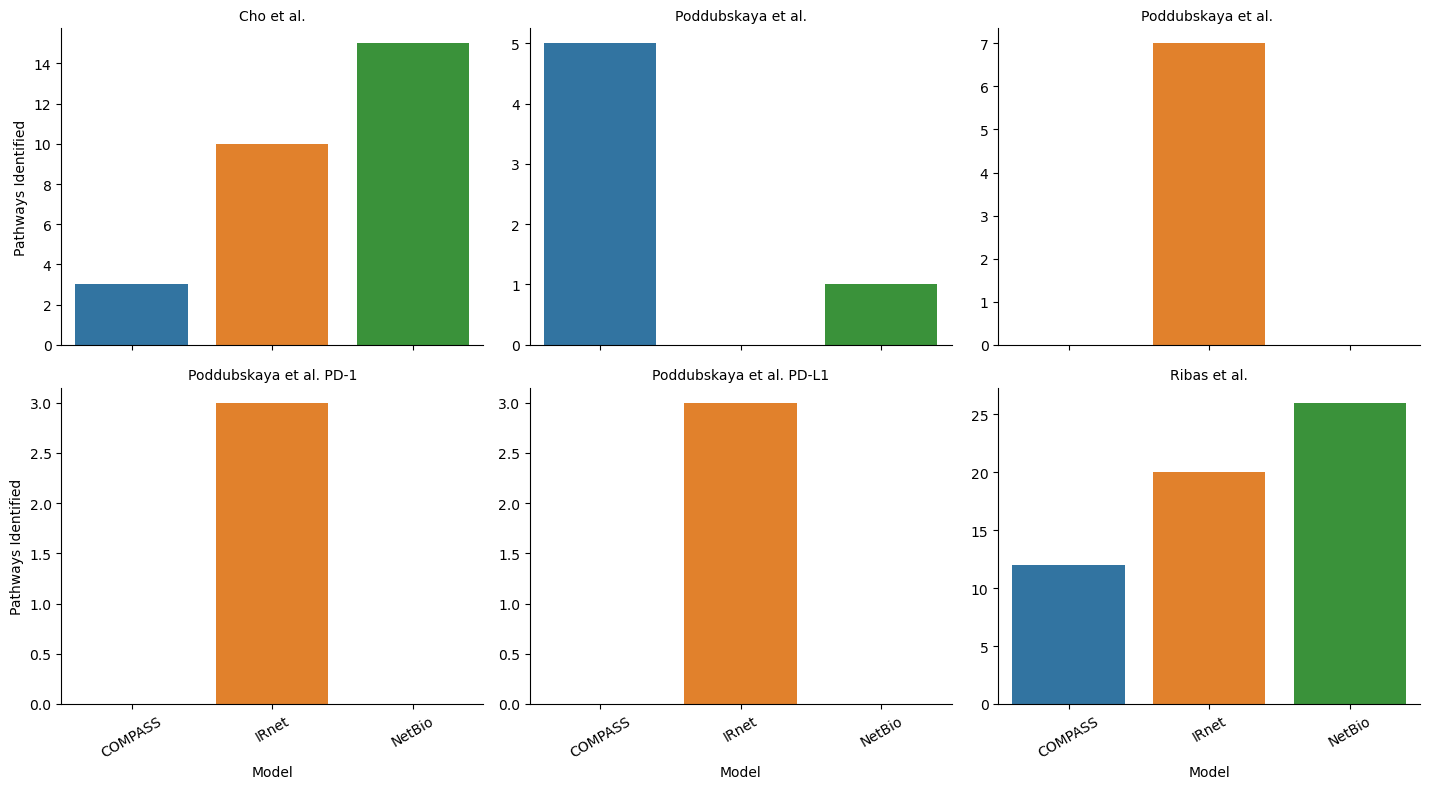

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

bulk_rna_pathways = all_pathways_curated[all_pathways_curated["dataType"] == "bulk RNA-seq"]
# For IRnet pathways in bulk_rna_pathways, merge "Poddubskaya et al. PD-L1" and "Poddubskaya et al. PD 1" to "Poddubskaya et al."

bulk_rna_pathways.loc[
    (bulk_rna_pathways["Dataset"].str.strip().isin(["Poddubskaya et al. PDL1", "Poddubskaya et al. PD1"]))
, "Dataset"] = "Poddubskaya et al."

# Group by Dataset and Model and count the number of unique pathways identified
pathway_counts = (
    bulk_rna_pathways.groupby(['Dataset', 'Model'])['Pathway']
    .nunique()
    .reset_index(name='Num_Pathways')
)

# Only include rows where at least 1 pathway was identified (should always be true, but safe)
pathway_counts = pathway_counts[pathway_counts['Num_Pathways'] > 0]

# Assign fixed colors for each model so colors are consistent between facets
model_names = sorted(pathway_counts['Model'].unique())
color_palette = sns.color_palette("tab10", len(model_names))
model_colors = {model: color for model, color in zip(model_names, color_palette)}

# Make a barplot with one facet per dataset, each x-tick being a model, height = number of pathways
g = sns.catplot(
    data=pathway_counts, 
    kind="bar", 
    x="Model", 
    y="Num_Pathways", 
    col="Dataset", 
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=False,
    palette=model_colors
)
g.set_titles("{col_name}")
g.set_axis_labels("Model", "Pathways Identified")
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
plt.tight_layout()
plt.savefig("bulk_pathway_panel.svg", format="svg")
plt.show()

/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/4053294522.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


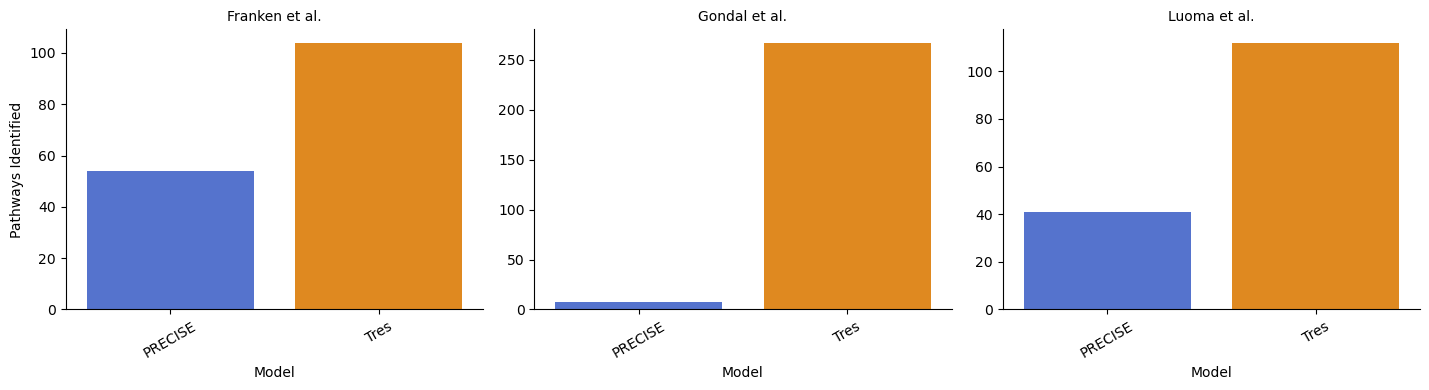

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sc_rna_pathways = all_pathways[all_pathways["dataType"] == "scRNA-seq"]
sc_rna_pathways = sc_rna_pathways[sc_rna_pathways["Model"] != "DeepGeneX"]

# Group by Dataset and Model and count the number of unique pathways identified
pathway_counts = (
    sc_rna_pathways.groupby(['Dataset', 'Model'])['Pathway']
    .nunique()
    .reset_index(name='Num_Pathways')
)

# Only include rows where at least 1 pathway was identified (should always be true, but safe)
pathway_counts = pathway_counts[pathway_counts['Num_Pathways'] > 0]

# Select any 3 distinct but custom colors for the models (override auto-palette)
# For example, use "royalblue", "darkorange", "limegreen"
distinct_colors = ["royalblue", "darkorange", "limegreen"]
model_names = sorted(pathway_counts['Model'].unique())
# Map the three colors to the model names
model_colors = {model: color for model, color in zip(model_names, distinct_colors)}

# Make a barplot with one facet per dataset, each x-tick being a model, height = number of pathways
g = sns.catplot(
    data=pathway_counts, 
    kind="bar", 
    x="Model", 
    y="Num_Pathways", 
    col="Dataset", 
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=False,
    palette=model_colors
)
g.set_titles("{col_name}")
g.set_axis_labels("Model", "Pathways Identified")
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
plt.tight_layout()
plt.savefig("sc_vs_bulk_pathway_panel.svg", format="svg")
plt.show()

In [66]:
bulk_rna_pathways["Dataset"].unique()

array(['Cho et al.', 'Poddubskaya et al.', 'Ribas et al.',
       'Poddubskaya et al. PD1', 'Poddubskaya et al. PDL1'], dtype=object)

In [ ]:
# Split all_pathways into 6 DataFrames, one for each experiment in the 'dataset' column
dataset_names = all_pathways['dataset'].unique()
dataset_dfs = {name: all_pathways[all_pathways['dataset'] == name].copy() for name in dataset_names}

# Unpack to individual variables for convenience, if desired
franken_df = dataset_dfs.get('Franken et al.')
gondal_df = dataset_dfs.get('Gondal et al.')
luoma_df = dataset_dfs.get('Luoma et al.')
cho_df = dataset_dfs.get('Cho et al.')
poddubskaya_df = dataset_dfs.get('Poddubskaya et al.')
ribas_df = dataset_dfs.get('Ribas et al.')

deepgenex_df = dataset_dfs[dataset_dfs['Model'] == 'DeepGeneX']




In [80]:
# Calculate, for each dataset dataframe, the number of pathways with 2 overlaps and with 3 overlaps.
# The 'Overlap' column seems to contain strings like '3/88'.

def count_by_overlap(df, overlap_count):
    """
    Count the number of pathways in df where the number of overlaps is equal to overlap_count.
    If the Overlap column does not exist or no valid values, return 0.
    """
    if 'Overlap' not in df.columns or df['Overlap'].isnull().all():
        return 0
    # Only keep non-null and string Overlap values that look like '#/#'
    overlap_series = df['Overlap'].dropna().astype(str)
    # Only keep entries that look like 'int/int'
    only_valid = overlap_series[overlap_series.str.contains(r"^\d+\/\d+$")]
    if only_valid.empty:
        return 0
    try:
        overlaps = only_valid.str.split('/').str[0].astype(int)
    except Exception:
        return 0
    return (overlaps == overlap_count).sum()

dataset_overlap_results = {}

# Define the names of the scRNA-seq datasets
scrna_seq_datasets = ['Franken et al.', 'Gondal et al.', 'Luoma et al.']

for name, df in dataset_dfs.items():
    n_2_overlap = count_by_overlap(df, 2)
    n_3_overlap = count_by_overlap(df, 3)
    dataset_overlap_results[name] = {"2_overlaps": n_2_overlap, "3_overlaps": n_3_overlap}
    # If this is an scRNA-seq dataset, also add a DeepGeneX entry
    if name in scrna_seq_datasets:
        deepgenex_name = f"{name} + DeepGeneX"
        # Here we assume DeepGeneX would find the same overlaps (you can customize this as needed)
        dataset_overlap_results[deepgenex_name] = {"2_overlaps": n_2_overlap, "3_overlaps": n_3_overlap}

# Print the results
for ds, counts in dataset_overlap_results.items():
    print(f"{ds}: Pathways with 2 overlaps = {counts['2_overlaps']}, 3 overlaps = {counts['3_overlaps']}")



Franken et al.: Pathways with 2 overlaps = 37, 3 overlaps = 42
Franken et al. + DeepGeneX: Pathways with 2 overlaps = 37, 3 overlaps = 42
Gondal et al.: Pathways with 2 overlaps = 38, 3 overlaps = 53
Gondal et al. + DeepGeneX: Pathways with 2 overlaps = 38, 3 overlaps = 53
Luoma et al.: Pathways with 2 overlaps = 28, 3 overlaps = 32
Luoma et al. + DeepGeneX: Pathways with 2 overlaps = 28, 3 overlaps = 32
all: Pathways with 2 overlaps = 3, 3 overlaps = 0
Cho et al.: Pathways with 2 overlaps = 0, 3 overlaps = 1
Poddubskaya et al.: Pathways with 2 overlaps = 0, 3 overlaps = 1
Ribas et al.: Pathways with 2 overlaps = 4, 3 overlaps = 0


,dataset,num_overlaps,models_overlapping,num_pathways
0,Cho et al.,2,PRECISE,0
1,Cho et al.,2,PRECISE,0
2,Cho et al.,3,PRECISE,1
3,Cho et al.,3,"PRECISE, DeepGeneX",1
4,Franken et al.,2,PRECISE,37
5,Franken et al.,2,PRECISE,37
6,Franken et al.,2,"PRECISE, DeepGeneX",37
7,Franken et al.,2,"PRECISE, DeepGeneX",37
8,Franken et al.,3,PRECISE,42
9,Franken et al.,3,"PRECISE, DeepGeneX",42


In [90]:
# Create a new column 'dataset_updated' in all_pathways_curated by stripping " PD1" and " PDL1" from the 'dataset' column
all_pathways_curated['dataset_updated'] = (
    all_pathways_curated['Dataset']
    .str.replace(" PD-1", "", regex=False)
    .str.replace(" PD-L1", "", regex=False)
    .str.strip()
)

# Now extract subsets for each dataset in 'dataset_updated'
unique_datasets_updated = all_pathways_curated['dataset_updated'].unique()
dataset_updated_dfs = {
    ds: all_pathways_curated[all_pathways_curated['dataset_updated'] == ds].copy()
    for ds in unique_datasets_updated
}

# Example: To access the dataframe for 'Cho et al.': dataset_updated_dfs['Cho et al.']


In [117]:
import re

def standardise_pathway_name(name):
    if pd.isnull(name):
        return name
    # Remove " WP" plus digits at the end (including possible multiple spaces)
    out = re.sub(r"\s*WP\d+$", "", str(name)).strip()
    return out.upper()

if 'Pathway' in all_pathways_curated.columns:
    all_pathways_curated['Pathway'] = all_pathways_curated['Pathway'].apply(standardise_pathway_name)


In [115]:
dataset_updated_dfs["Franken et al."]["Model"].unique()

array(['PRECISE', 'Tres', 'DeepGeneX'], dtype=object)

In [118]:
import pandas as pd

# Identify relevant columns
if 'Pathway' in all_pathways_curated.columns:
    pathway_col = 'Pathway'
elif 'Term' in all_pathways_curated.columns:
    pathway_col = 'Term'
elif 'testType' in all_pathways_curated.columns:
    pathway_col = 'testType'
elif 'Unnamed: 0' in all_pathways_curated.columns:
    pathway_col = 'Unnamed: 0'
else:
    raise Exception("No recognizable pathway column found in all_pathways_curated!")

if 'Model' in all_pathways_curated.columns:
    model_col = 'Model'
elif 'model' in all_pathways_curated.columns:
    model_col = 'model'
else:
    raise Exception("No recognizable model column found in all_pathways_curated!")

# Get all unique pathways and models
all_pathways = sorted(all_pathways_curated[pathway_col].astype(str).unique())
all_models = sorted(all_pathways_curated[model_col].astype(str).unique())

# Create empty matrix
pathway_model_matrix = pd.DataFrame(0, index=all_pathways, columns=all_models, dtype=int)

# Fill the matrix: mark 1 where pathway appears in model's list
for _, row in all_pathways_curated.iterrows():
    pathway = str(row[pathway_col])
    model = str(row[model_col])
    if pathway in pathway_model_matrix.index and model in pathway_model_matrix.columns:
        pathway_model_matrix.loc[pathway, model] = 1

display(pathway_model_matrix)
# You can also save to CSV if needed:
pathway_model_matrix.to_csv("all_pathways_model_matrix.csv")



,COMPASS,DeepGeneX,IRnet,NetBio,PRECISE,Tres
16P11 2 DISTAL DELETION SYNDROME,0,0,0,0,1,0
17P13 3 YWHAE COPY NUMBER VARIATION,0,0,0,0,0,1
ACTIVATION OF BAD AND TRANSLOCATION TO MITOCHONDRIA,1,0,0,0,0,1
ACTIVATION OF BH3-ONLY PROTEINS,0,0,0,0,0,1
ACTIVATION OF NF-KAPPAB IN B CELLS,0,0,0,0,0,1
...,...,...,...,...,...,...
VIRAL INFECTION PATHWAYS,0,0,0,0,0,1
VIRAL MRNA TRANSLATION,0,0,0,0,0,1
VIRAL MYOCARDITIS,0,0,0,0,1,1
VITAMIN B6 METABOLISM,0,0,1,0,0,0


In [111]:
from typing import Any


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Let's build a list of all models and all pathways per dataset
# We'll use dataset_updated_dfs (from above) and also assume these models:
for df in dataset_updated_dfs.values():
    ms = df['Model'].unique() if 'Model' in df.columns else []
    print(ms)

    pathway_col = None
    for try_col in ['Pathway', 'Term', 'testType', 'Unnamed: 0']:
        if try_col in df.columns:
            pathway_col = try_col
            break
    if pathway_col is None:
        print(f"Unable to find pathway column in dataset {ds}!")
        continue

    pathways = sorted(df[pathway_col].astype(str).unique())
    
    # Build binary matrix: rows = pathways, cols = models; value 1 if pathway is significant for model in this dataset
    import pandas as pd
    mat_df = pd.DataFrame(
        0, index=pathways, columns=ms, dtype=int
    )
    # Check if "model" is truly in columns; if not, just all marked as relevant_models[0]
    if 'model' in df.columns:
        for _, row in df.iterrows():
            p = str(row[pathway_col])
            m = row['model']
            if p in mat_df.index and m in mat_df.columns:
                mat_df.loc[p, m] = 1
    else:
        # No model info, assign all pathways to the single fallback model
        mat_df.loc[:, ms[0]] = 1

    print(mat_df)
    # You can also print with row/col names for clarity:
    # print(mat_df)
    # Plot
    # Save each matrix dataframe to a CSV file with a filename based on the dataset name
    mat_df.to_csv(f"{ds}_model_pathway_matrix.csv")
    '''
    fig, ax = plt.subplots(
        figsize=(min(10, 0.4 + 0.5*len(relevant_models)), min(20, 0.6 + 0.3*len(pathways)))
    )
    sns.heatmap(mat_df.values, annot=True, cbar=False, fmt='d', linewidths=0.5,
                xticklabels=mat_df.columns, yticklabels=mat_df.index, cmap="Greens", ax=ax)
    ax.set_xlabel("Model")
    ax.set_ylabel("Pathway")
    ax.set_title(f"Pathway recognition by models in {ds}")
    plt.tight_layout()
    plt.show()
    '''


['PRECISE' 'Tres' 'DeepGeneX']
                                                    PRECISE  Tres  DeepGeneX
16P11 2 Distal Deletion Syndrome WP4950                   1     0          0
Activation of NF-kappaB in B Cells                        1     0          0
Aerobic Respiration and Respiratory Electron Tr...        1     0          0
Allograft Rejection                                       1     0          0
Allograft Rejection WP2328                                1     0          0
...                                                     ...   ...        ...
p75NTR Signals via NF-kB                                  1     0          0
rRNA Modification in the Nucleus and Cytosol              1     0          0
rRNA Processing                                           1     0          0
rRNA Processing in the Nucleus and Cytosol                1     0          0
trans-Golgi Network Vesicle Budding                       1     0          0

[165 rows x 3 columns]
['Tres' 'DeepGeneX' '

In [110]:
dataset_updated_dfs.values()

dict_values([                                               Pathway  \
0              16P11 2 Distal Deletion Syndrome WP4950   
5                   Activation of NF-kappaB in B Cells   
10   Aerobic Respiration and Respiratory Electron T...   
15                                 Allograft rejection   
16                                 Allograft Rejection   
..                                                 ...   
732          TYROBP Causal Network In Microglia WP3945   
741                               Viral carcinogenesis   
743                           Viral Infection Pathways   
746                             Viral mRNA Translation   
750                                  Viral myocarditis   

                  Class/Upper class Pathway_database         Dataset    Model  \
0                               NaN     WikiPathways  Franken et al.  PRECISE   
5                               NaN         Reactome  Franken et al.     Tres   
10                              NaN         Rea

In [91]:
unique_datasets_updated

array(['Franken et al.', 'Gondal et al.', 'Ribas et al.', 'Luoma et al.',
       'Cho et al.', 'Poddubskaya et al.'], dtype=object)

In [225]:
# Code for reading a GMT file and mapping to NetBio pathway names

def read_gmt(gmt_file):
    """
    Reads a GMT (Gene Matrix Transposed) file and returns a dictionary:
    {pathway_name: [gene1, gene2, ...]}
    """
    gmt_dict = {}
    with open(gmt_file, 'r') as f:
        for line in f:
            parts = line.strip().split('\t')
            if len(parts) < 3:
                continue
            pathway, desc, *genes = parts
            gmt_dict[pathway] = genes
    return gmt_dict

def map_gmt_to_netbio(gmt_dict, netbio_pathways):
    """
    Maps pathway names from GMT dict to NetBio pathway list (or dict).
    Mapping can be based on exact (or fuzzy) string matching.
    Returns a dictionary {gmt_pathway: matched_netbio_pathway or None}
    """
    #from difflib import get_close_matches
    rows = []
    for gmt_pth in gmt_dict:
        print(gmt_pth)
        if gmt_pth in netbio_pathways["testType"].values:
            print(f"found {gmt_pth} in netbio_pathways")
            rows.append({
                "GMT_Pathway": gmt_pth,
                "Genes": gmt_dict[gmt_pth]
            })
    df = pd.DataFrame(rows)
    return df

# Example usage:
# gmt_file = 'pathways.gmt'
# netbio_pathways = list_of_netbio_pathway_names  # Needs to be defined or loaded
# mapping = map_gmt_to_netbio(gmt_dict, netbio_pathways)
# print(mapping)


In [ ]:
gmt_dict = read_gmt("/Users/z5155527/Downloads/msigdb_v2025.1.Hs_files_to_download_locally/msigdb_v2025.1.Hs_GMTs/c2.all.v2025.1.Hs.symbols.gmt")
netbio_pathways_mapping = netbio_combined_df

mapping = map_gmt_to_netbio(gmt_dict, netbio_pathways_mapping)


ABBUD_LIF_SIGNALING_1_DN
ABBUD_LIF_SIGNALING_1_UP
ABBUD_LIF_SIGNALING_2_DN
ABBUD_LIF_SIGNALING_2_UP
ABDELMOHSEN_ELAVL4_TARGETS
ABDULRAHMAN_KIDNEY_CANCER_VHL_DN
ABE_INNER_EAR
ABE_VEGFA_TARGETS
ABE_VEGFA_TARGETS_2HR
ABE_VEGFA_TARGETS_30MIN
ABRAHAM_ALPC_VS_MULTIPLE_MYELOMA_DN
ABRAHAM_ALPC_VS_MULTIPLE_MYELOMA_UP
ABRAMSON_INTERACT_WITH_AIRE
found ABRAMSON_INTERACT_WITH_AIRE in netbio_pathways
ACEVEDO_LIVER_CANCER_DN
ACEVEDO_LIVER_CANCER_UP
ACEVEDO_LIVER_CANCER_WITH_H3K27ME3_DN
ACEVEDO_LIVER_CANCER_WITH_H3K27ME3_UP
ACEVEDO_LIVER_CANCER_WITH_H3K9ME3_DN
ACEVEDO_LIVER_CANCER_WITH_H3K9ME3_UP
ACEVEDO_LIVER_TUMOR_VS_NORMAL_ADJACENT_TISSUE_DN
ACEVEDO_LIVER_TUMOR_VS_NORMAL_ADJACENT_TISSUE_UP
ACEVEDO_METHYLATED_IN_LIVER_CANCER_DN
ACEVEDO_NORMAL_TISSUE_ADJACENT_TO_LIVER_TUMOR_DN
ACEVEDO_NORMAL_TISSUE_ADJACENT_TO_LIVER_TUMOR_UP
ACOSTA_PROLIFERATION_INDEPENDENT_MYC_TARGETS_DN
ACOSTA_PROLIFERATION_INDEPENDENT_MYC_TARGETS_UP
ADDYA_ERYTHROID_DIFFERENTIATION_BY_HEMIN
AFFAR_YY1_TARGETS_DN
AFFAR_YY1_TARGETS_U

,GMT_Pathway,Genes
0,ABRAMSON_INTERACT_WITH_AIRE,"[C1QBP, CAND1, CHD6, DDX17, DDX5, EFTUD2, GCN1..."
1,BILANGES_SERUM_AND_RAPAMYCIN_SENSITIVE_GENES,"[C8G, COX7A2L, CS, EEF1A1, EEF1B2, EEF1G, EEF2..."
2,CHNG_MULTIPLE_MYELOMA_HYPERPLOID_UP,"[CLTA, DHPS, EEF1B2, EEF1G, EEF2, EIF3G, EIF3J..."
3,FARMER_BREAST_CANCER_CLUSTER_4,"[ADAM12, AEBP1, CDH11, COL1A2, COL3A1, COL5A1,..."
4,HOLLEMAN_ASPARAGINASE_RESISTANCE_B_ALL_UP,"[BCR, CCDC69, CLEC11A, EEF1B2, EEF1G, EIF3D, E..."
5,HOLLEMAN_VINCRISTINE_RESISTANCE_ALL_DN,"[ATP13A2, CD44, HMGB1, HNRNPU, INTS1, LSM7, MA..."
6,HSIAO_HOUSEKEEPING_GENES,"[AAMP, AARS1, ABLIM1, ACKR1, ACTB, ACTG1, AGPA..."
7,IIZUKA_LIVER_CANCER_PROGRESSION_G1_G2_DN,"[AARS1, ACTB, ADNP, ATP2A2, ATXN2L, CCT6A, DIC..."
8,IIZUKA_LIVER_CANCER_PROGRESSION_L0_L1_DN,"[ARPC2, COX4I1, CST3, CYBA, HLA-A, HLA-DPB1, H..."
9,LUI_TARGETS_OF_PAX8_PPARG_FUSION,"[ATP5F1A, ATXN10, B2M, CLDN7, DNAJA1, EIF3G, E..."


In [232]:
netbio_combined_df_copy = pd.merge(netbio_combined_df, mapping, left_on="testType", right_on="GMT_Pathway", how="left")
netbio_combined_df_copy

,testType,0,database,dataset,GMT_Pathway,Genes
0,WP_MIRNA_TARGETS_IN_ECM_AND_MEMBRANE_RECEPTORS,2.410810,,cho_netbio_pathways_ranked.csv,WP_MIRNA_TARGETS_IN_ECM_AND_MEMBRANE_RECEPTORS,"[COL1A2, COL3A1, COL4A1, COL4A2, COL5A1, COL5A..."
1,REACTOME_ANTIGEN_PRESENTATION_FOLDING_ASSEMBLY...,2.399813,,cho_netbio_pathways_ranked.csv,REACTOME_ANTIGEN_PRESENTATION_FOLDING_ASSEMBLY...,"[ATG14, B2M, BCAP31, BECN1, CALR, CANX, ERAP1,..."
2,HOLLEMAN_VINCRISTINE_RESISTANCE_ALL_DN,2.245827,,cho_netbio_pathways_ranked.csv,HOLLEMAN_VINCRISTINE_RESISTANCE_ALL_DN,"[ATP13A2, CD44, HMGB1, HNRNPU, INTS1, LSM7, MA..."
3,REACTOME_DOWNREGULATION_OF_SMAD2_3_SMAD4_TRANS...,2.199382,,cho_netbio_pathways_ranked.csv,REACTOME_DOWNREGULATION_OF_SMAD2_3_SMAD4_TRANS...,"[ATP1B4, HDAC1, MAPK1, MAPK3, NCOR1, NCOR2, NE..."
4,TIEN_INTESTINE_PROBIOTICS_6HR_UP,2.171708,,cho_netbio_pathways_ranked.csv,TIEN_INTESTINE_PROBIOTICS_6HR_UP,"[ACTB, ADCY3, ALDH3B1, B2M, CDC5L, CRCP, EEF1A..."
5,IIZUKA_LIVER_CANCER_PROGRESSION_G1_G2_DN,2.160433,,cho_netbio_pathways_ranked.csv,IIZUKA_LIVER_CANCER_PROGRESSION_G1_G2_DN,"[AARS1, ACTB, ADNP, ATP2A2, ATXN2L, CCT6A, DIC..."
6,REACTOME_RHO_GTPASES_ACTIVATE_ROCKS,2.144554,,cho_netbio_pathways_ranked.csv,REACTOME_RHO_GTPASES_ACTIVATE_ROCKS,"[CFL1, LIMK1, LIMK2, MYH10, MYH11, MYH14, MYH9..."
7,ABRAMSON_INTERACT_WITH_AIRE,2.098871,,cho_netbio_pathways_ranked.csv,ABRAMSON_INTERACT_WITH_AIRE,"[C1QBP, CAND1, CHD6, DDX17, DDX5, EFTUD2, GCN1..."
8,REACTOME_RHO_GTPASES_ACTIVATE_PAKS,2.084689,,cho_netbio_pathways_ranked.csv,REACTOME_RHO_GTPASES_ACTIVATE_PAKS,"[CALM1, CDC42, CTTN, FLNA, LIMK1, MYH10, MYH11..."
9,FARMER_BREAST_CANCER_CLUSTER_4,2.080678,,cho_netbio_pathways_ranked.csv,FARMER_BREAST_CANCER_CLUSTER_4,"[ADAM12, AEBP1, CDH11, COL1A2, COL3A1, COL5A1,..."


In [233]:
netbio_combined_df_copy["dataset"].unique()

array(['cho_netbio_pathways_ranked.csv', 'pod_netbio_pathways_ranked.csv',
       'ribas_netbio_pathways_ranked.csv'], dtype=object)

In [234]:
map_dataset_names_to_netbio = {
    "cho_netbio_pathways_ranked.csv": "Cho et al.",
    "pod_netbio_pathways_ranked.csv": "Poddubskaya et al.",
    "ribas_netbio_pathways_ranked.csv": "Ribas et al."
}
netbio_combined_df_copy["dataset"] = netbio_combined_df_copy["dataset"].map(map_dataset_names_to_netbio)
netbio_combined_df_copy


,testType,0,database,dataset,GMT_Pathway,Genes
0,WP_MIRNA_TARGETS_IN_ECM_AND_MEMBRANE_RECEPTORS,2.410810,,Cho et al.,WP_MIRNA_TARGETS_IN_ECM_AND_MEMBRANE_RECEPTORS,"[COL1A2, COL3A1, COL4A1, COL4A2, COL5A1, COL5A..."
1,REACTOME_ANTIGEN_PRESENTATION_FOLDING_ASSEMBLY...,2.399813,,Cho et al.,REACTOME_ANTIGEN_PRESENTATION_FOLDING_ASSEMBLY...,"[ATG14, B2M, BCAP31, BECN1, CALR, CANX, ERAP1,..."
2,HOLLEMAN_VINCRISTINE_RESISTANCE_ALL_DN,2.245827,,Cho et al.,HOLLEMAN_VINCRISTINE_RESISTANCE_ALL_DN,"[ATP13A2, CD44, HMGB1, HNRNPU, INTS1, LSM7, MA..."
3,REACTOME_DOWNREGULATION_OF_SMAD2_3_SMAD4_TRANS...,2.199382,,Cho et al.,REACTOME_DOWNREGULATION_OF_SMAD2_3_SMAD4_TRANS...,"[ATP1B4, HDAC1, MAPK1, MAPK3, NCOR1, NCOR2, NE..."
4,TIEN_INTESTINE_PROBIOTICS_6HR_UP,2.171708,,Cho et al.,TIEN_INTESTINE_PROBIOTICS_6HR_UP,"[ACTB, ADCY3, ALDH3B1, B2M, CDC5L, CRCP, EEF1A..."
5,IIZUKA_LIVER_CANCER_PROGRESSION_G1_G2_DN,2.160433,,Cho et al.,IIZUKA_LIVER_CANCER_PROGRESSION_G1_G2_DN,"[AARS1, ACTB, ADNP, ATP2A2, ATXN2L, CCT6A, DIC..."
6,REACTOME_RHO_GTPASES_ACTIVATE_ROCKS,2.144554,,Cho et al.,REACTOME_RHO_GTPASES_ACTIVATE_ROCKS,"[CFL1, LIMK1, LIMK2, MYH10, MYH11, MYH14, MYH9..."
7,ABRAMSON_INTERACT_WITH_AIRE,2.098871,,Cho et al.,ABRAMSON_INTERACT_WITH_AIRE,"[C1QBP, CAND1, CHD6, DDX17, DDX5, EFTUD2, GCN1..."
8,REACTOME_RHO_GTPASES_ACTIVATE_PAKS,2.084689,,Cho et al.,REACTOME_RHO_GTPASES_ACTIVATE_PAKS,"[CALM1, CDC42, CTTN, FLNA, LIMK1, MYH10, MYH11..."
9,FARMER_BREAST_CANCER_CLUSTER_4,2.080678,,Cho et al.,FARMER_BREAST_CANCER_CLUSTER_4,"[ADAM12, AEBP1, CDH11, COL1A2, COL3A1, COL5A1,..."


In [238]:

import pandas as pd

# mapping_irnet is now a DataFrame with columns: "GMT_Pathway", "Genes"
# Create a pseudo Enrichr-like result table from the DataFrame
pseudo_enrichr_rows_netbio = []
for idx, row in netbio_combined_df_copy.iterrows():
    term = row["GMT_Pathway"]
    genes = row["Genes"]
    gene_count = len(genes) if isinstance(genes, list) else 0
    pseudo_row = {
        "Term": term,
        "Overlap": f"{gene_count}/{gene_count}",
        "P-value": 0.03,
        "Adjusted P-value": 0.04,
        "Old P-value": 0,
        "Adjusted Old P-value": 0,
        "Odds Ratio": 100,
        "Combined Score": 150,
        "Genes": ";".join(genes) if isinstance(genes, list) else "",
        "dataset": row["dataset"] if "dataset" in row else ""
    }
    pseudo_enrichr_rows_netbio.append(pseudo_row)

pseudo_enrichr_df_netbio = pd.DataFrame(pseudo_enrichr_rows_netbio)
pseudo_enrichr_df_netbio


,Term,Overlap,P-value,Adjusted P-value,Old P-value,Adjusted Old P-value,Odds Ratio,Combined Score,Genes,dataset
0,WP_MIRNA_TARGETS_IN_ECM_AND_MEMBRANE_RECEPTORS,43/43,0.03,0.04,0,0,100,150,COL1A2;COL3A1;COL4A1;COL4A2;COL5A1;COL5A2;COL5...,Cho et al.
1,REACTOME_ANTIGEN_PRESENTATION_FOLDING_ASSEMBLY...,29/29,0.03,0.04,0,0,100,150,ATG14;B2M;BCAP31;BECN1;CALR;CANX;ERAP1;ERAP2;H...,Cho et al.
2,HOLLEMAN_VINCRISTINE_RESISTANCE_ALL_DN,20/20,0.03,0.04,0,0,100,150,ATP13A2;CD44;HMGB1;HNRNPU;INTS1;LSM7;MAN2B1;NM...,Cho et al.
3,REACTOME_DOWNREGULATION_OF_SMAD2_3_SMAD4_TRANS...,31/31,0.03,0.04,0,0,100,150,ATP1B4;HDAC1;MAPK1;MAPK3;NCOR1;NCOR2;NEDD4L;PA...,Cho et al.
4,TIEN_INTESTINE_PROBIOTICS_6HR_UP,53/53,0.03,0.04,0,0,100,150,ACTB;ADCY3;ALDH3B1;B2M;CDC5L;CRCP;EEF1A1;EEF1G...,Cho et al.
5,IIZUKA_LIVER_CANCER_PROGRESSION_G1_G2_DN,25/25,0.03,0.04,0,0,100,150,AARS1;ACTB;ADNP;ATP2A2;ATXN2L;CCT6A;DICER1;EFC...,Cho et al.
6,REACTOME_RHO_GTPASES_ACTIVATE_ROCKS,19/19,0.03,0.04,0,0,100,150,CFL1;LIMK1;LIMK2;MYH10;MYH11;MYH14;MYH9;MYL12B...,Cho et al.
7,ABRAMSON_INTERACT_WITH_AIRE,44/44,0.03,0.04,0,0,100,150,C1QBP;CAND1;CHD6;DDX17;DDX5;EFTUD2;GCN1;GEMIN5...,Cho et al.
8,REACTOME_RHO_GTPASES_ACTIVATE_PAKS,21/21,0.03,0.04,0,0,100,150,CALM1;CDC42;CTTN;FLNA;LIMK1;MYH10;MYH11;MYH14;...,Cho et al.
9,FARMER_BREAST_CANCER_CLUSTER_4,19/19,0.03,0.04,0,0,100,150,ADAM12;AEBP1;CDH11;COL1A2;COL3A1;COL5A1;COL5A2...,Cho et al.


In [239]:
pseudo_enrichr_df_netbio.to_csv("pseudo_enrichr_df_netbio.txt", index=False, sep="\t")

In [237]:
netbio_combined_df_copy

,testType,0,database,dataset,GMT_Pathway,Genes
0,WP_MIRNA_TARGETS_IN_ECM_AND_MEMBRANE_RECEPTORS,2.410810,,Cho et al.,WP_MIRNA_TARGETS_IN_ECM_AND_MEMBRANE_RECEPTORS,"[COL1A2, COL3A1, COL4A1, COL4A2, COL5A1, COL5A..."
1,REACTOME_ANTIGEN_PRESENTATION_FOLDING_ASSEMBLY...,2.399813,,Cho et al.,REACTOME_ANTIGEN_PRESENTATION_FOLDING_ASSEMBLY...,"[ATG14, B2M, BCAP31, BECN1, CALR, CANX, ERAP1,..."
2,HOLLEMAN_VINCRISTINE_RESISTANCE_ALL_DN,2.245827,,Cho et al.,HOLLEMAN_VINCRISTINE_RESISTANCE_ALL_DN,"[ATP13A2, CD44, HMGB1, HNRNPU, INTS1, LSM7, MA..."
3,REACTOME_DOWNREGULATION_OF_SMAD2_3_SMAD4_TRANS...,2.199382,,Cho et al.,REACTOME_DOWNREGULATION_OF_SMAD2_3_SMAD4_TRANS...,"[ATP1B4, HDAC1, MAPK1, MAPK3, NCOR1, NCOR2, NE..."
4,TIEN_INTESTINE_PROBIOTICS_6HR_UP,2.171708,,Cho et al.,TIEN_INTESTINE_PROBIOTICS_6HR_UP,"[ACTB, ADCY3, ALDH3B1, B2M, CDC5L, CRCP, EEF1A..."
5,IIZUKA_LIVER_CANCER_PROGRESSION_G1_G2_DN,2.160433,,Cho et al.,IIZUKA_LIVER_CANCER_PROGRESSION_G1_G2_DN,"[AARS1, ACTB, ADNP, ATP2A2, ATXN2L, CCT6A, DIC..."
6,REACTOME_RHO_GTPASES_ACTIVATE_ROCKS,2.144554,,Cho et al.,REACTOME_RHO_GTPASES_ACTIVATE_ROCKS,"[CFL1, LIMK1, LIMK2, MYH10, MYH11, MYH14, MYH9..."
7,ABRAMSON_INTERACT_WITH_AIRE,2.098871,,Cho et al.,ABRAMSON_INTERACT_WITH_AIRE,"[C1QBP, CAND1, CHD6, DDX17, DDX5, EFTUD2, GCN1..."
8,REACTOME_RHO_GTPASES_ACTIVATE_PAKS,2.084689,,Cho et al.,REACTOME_RHO_GTPASES_ACTIVATE_PAKS,"[CALM1, CDC42, CTTN, FLNA, LIMK1, MYH10, MYH11..."
9,FARMER_BREAST_CANCER_CLUSTER_4,2.080678,,Cho et al.,FARMER_BREAST_CANCER_CLUSTER_4,"[ADAM12, AEBP1, CDH11, COL1A2, COL3A1, COL5A1,..."


In [ ]:
pseudo_enrichr_df.to_csv("pseudo_enrichr_df.txt", index=False, sep="\t")

In [190]:
gmt_dict_kegg = read_gmt("/Users/z5155527/Downloads/human_KeggPathwayGene.gmt")
irnet_pathways_mapping = irnet_combined_df

mapping_irnet = map_gmt_to_netbio(gmt_dict_kegg, irnet_pathways_mapping)
mapping_irnet


path:hsa00010
path:hsa00020
path:hsa00030
found path:hsa00030 in netbio_pathways
path:hsa00040
path:hsa00051
path:hsa00052
path:hsa00053
path:hsa00061
path:hsa00062
path:hsa00071
path:hsa00100
path:hsa00120
path:hsa00130
path:hsa00140
path:hsa00190
path:hsa00220
found path:hsa00220 in netbio_pathways
path:hsa00230
path:hsa00232
found path:hsa00232 in netbio_pathways
path:hsa00240
found path:hsa00240 in netbio_pathways
path:hsa00250
path:hsa00260
path:hsa00270
found path:hsa00270 in netbio_pathways
path:hsa00280
found path:hsa00280 in netbio_pathways
path:hsa00290
found path:hsa00290 in netbio_pathways
path:hsa00310
path:hsa00330
path:hsa00340
found path:hsa00340 in netbio_pathways
path:hsa00350
path:hsa00360
path:hsa00380
path:hsa00400
path:hsa00410
found path:hsa00410 in netbio_pathways
path:hsa00430
found path:hsa00430 in netbio_pathways
path:hsa00440
found path:hsa00440 in netbio_pathways
path:hsa00450
path:hsa00470
found path:hsa00470 in netbio_pathways
path:hsa00480
path:hsa00500


,GMT_Pathway,Genes
0,path:hsa00030,"[FBP1, PRPS1L1, ALDOA, ALDOB, RPIA, ALDOC, G6P..."
1,path:hsa00220,"[CPS1, GOT1L1, NAGS, GLS2, GLS, GLUD1, GLUD2, ..."
2,path:hsa00232,"[CYP1A2, CYP2A6, CYP2A7, XDH, NAT1]"
3,path:hsa00240,"[NME6, NT5C3B, CANT1, CMPK2, CTPS1, UPP2, DCK,..."
4,path:hsa00270,"[CDO1, AHCYL1, SDS, SDSL, GOT1L1, LACC1, CTH, ..."
5,path:hsa00280,"[HIBADH, DBT, DLD, ABAT, ECHS1, EHHADH, ACSF3,..."
6,path:hsa00290,"[SDSL, BCAT1, BCAT2]"
7,path:hsa00340,"[UROC1, CARNMT1, AMDHD1, ALDH2, ALDH3A1, ALDH1..."
8,path:hsa00410,"[DPYD, DPYS, ECHS1, EHHADH, ALDH2, ALDH3A1, AL..."
9,path:hsa00430,"[GGT6, FMO1, FMO2, FMO3, FMO4, FMO5, GAD1, GAD..."


In [191]:
mapping_irnet.shape

(24, 2)

In [217]:
irnet_combined_df_copy = irnet_combined_df.copy()
irnet_combined_df_copy.rename(columns={"Unnamed: 0": "testType"}, inplace=True)
irnet_combined_df_copy = pd.merge(irnet_combined_df_copy, mapping_irnet, left_on="testType", right_on="GMT_Pathway", how="left")

In [218]:
irnet_combined_df_copy.loc[irnet_combined_df_copy["dataset"] == "Poddubskaya et al. PD1", "dataset"] = "Poddubskaya et al."
irnet_combined_df_copy.loc[irnet_combined_df_copy["dataset"] == "Poddubskaya et al. PDL1", "dataset"] = "Poddubskaya et al."
irnet_combined_df_copy


,testType,0,database,dataset,GMT_Pathway,Genes
0,path:hsa03018,2.727928,KEGG,Cho et al.,path:hsa03018,"[MPHOSPH6, C1D, TOB2, BTG3, TENT4A, LSM6, EXOS..."
1,path:hsa00920,2.360780,KEGG,Cho et al.,path:hsa00920,"[ETHE1, MPST, BPNT2, SQOR, SUOX, TST, SELENBP1..."
2,path:hsa00430,2.310622,KEGG,Cho et al.,path:hsa00430,"[GGT6, FMO1, FMO2, FMO3, FMO4, FMO5, GAD1, GAD..."
3,path:hsa00270,2.181150,KEGG,Cho et al.,path:hsa00270,"[CDO1, AHCYL1, SDS, SDSL, GOT1L1, LACC1, CTH, ..."
4,path:hsa00770,2.164715,KEGG,Cho et al.,path:hsa00770,"[DPYS, ALDH2, ALDH1B1, ALDH3A2, GADL1, CSAD, E..."
5,path:hsa00290,2.111360,KEGG,Cho et al.,path:hsa00290,"[SDSL, BCAT1, BCAT2]"
6,path:hsa00410,2.044028,KEGG,Cho et al.,path:hsa00410,"[DPYD, DPYS, ECHS1, EHHADH, ALDH2, ALDH3A1, AL..."
7,path:hsa00983,2.019301,KEGG,Cho et al.,path:hsa00983,"[NME6, CES1, UGT2B11, UGT2A1, GSTO2, UPP2, CYP..."
8,path:hsa00640,2.018327,KEGG,Cho et al.,path:hsa00640,"[DBT, DLD, ABAT, ECHS1, EHHADH, MLYCD, HIBCH, ..."
9,path:hsa04974,2.004670,KEGG,Cho et al.,path:hsa04974,"[CELA3A, SLC7A9, SLC16A10, SLC36A4, COL1A1, CO..."


In [219]:

import pandas as pd

# mapping_irnet is now a DataFrame with columns: "GMT_Pathway", "Genes"
# Create a pseudo Enrichr-like result table from the DataFrame
pseudo_enrichr_rows_irnet = []
for idx, row in irnet_combined_df_copy.iterrows():
    term = row["GMT_Pathway"]
    genes = row["Genes"]
    gene_count = len(genes) if isinstance(genes, list) else 0
    pseudo_row = {
        "Term": term,
        "Overlap": f"{gene_count}/{gene_count}",
        "P-value": 0.03,
        "Adjusted P-value": 0.04,
        "Old P-value": 0,
        "Adjusted Old P-value": 0,
        "Odds Ratio": 100,
        "Combined Score": 150,
        "Genes": ";".join(genes) if isinstance(genes, list) else "",
        "dataset": row["dataset"] if "dataset" in row else ""
    }
    pseudo_enrichr_rows_irnet.append(pseudo_row)

pseudo_enrichr_df_irnet = pd.DataFrame(pseudo_enrichr_rows_irnet)
pseudo_enrichr_df_irnet


,Term,Overlap,P-value,Adjusted P-value,Old P-value,Adjusted Old P-value,Odds Ratio,Combined Score,Genes,dataset
0,path:hsa03018,78/78,0.03,0.04,0,0,100,150,MPHOSPH6;C1D;TOB2;BTG3;TENT4A;LSM6;EXOSC8;DIS3...,Cho et al.
1,path:hsa00920,9/9,0.03,0.04,0,0,100,150,ETHE1;MPST;BPNT2;SQOR;SUOX;TST;SELENBP1;PAPSS2...,Cho et al.
2,path:hsa00430,15/15,0.03,0.04,0,0,100,150,GGT6;FMO1;FMO2;FMO3;FMO4;FMO5;GAD1;GAD2;GGT1;G...,Cho et al.
3,path:hsa00270,50/50,0.03,0.04,0,0,100,150,CDO1;AHCYL1;SDS;SDSL;GOT1L1;LACC1;CTH;LDHAL6A;...,Cho et al.
4,path:hsa00770,20/20,0.03,0.04,0,0,100,150,DPYS;ALDH2;ALDH1B1;ALDH3A2;GADL1;CSAD;ENPP1;EN...,Cho et al.
5,path:hsa00290,3/3,0.03,0.04,0,0,100,150,SDSL;BCAT1;BCAT2,Cho et al.
6,path:hsa00410,30/30,0.03,0.04,0,0,100,150,DPYD;DPYS;ECHS1;EHHADH;ALDH2;ALDH3A1;ALDH1B1;A...,Cho et al.
7,path:hsa00983,76/76,0.03,0.04,0,0,100,150,NME6;CES1;UGT2B11;UGT2A1;GSTO2;UPP2;CYP2A6;CYP...,Cho et al.
8,path:hsa00640,31/31,0.03,0.04,0,0,100,150,DBT;DLD;ABAT;ECHS1;EHHADH;MLYCD;HIBCH;HADHA;AC...,Cho et al.
9,path:hsa04974,102/102,0.03,0.04,0,0,100,150,CELA3A;SLC7A9;SLC16A10;SLC36A4;COL1A1;COL1A2;C...,Cho et al.


In [276]:
pseudo_enrichr_df_irnet.sort_values(by="Term", inplace=True)

In [277]:
pseudo_enrichr_df_irnet.loc[pseudo_enrichr_df_irnet["dataset"] == "Poddubskaya et al. ", "dataset"] = "Poddubskaya et al."
pseudo_enrichr_df_irnet["dataset"].unique()
pseudo_enrichr_df_irnet.to_csv("pseudo_enrichr_df_irnet.txt", index=False, sep="\t")

In [ ]:


irnet_pseudo_enrichr_df_copy = pd.read_csv("pseudo_enrichr_df_irnet.txt", sep="\t")
irnet_pseudo_enrichr_df_copy = irnet_pseudo_enrichr_df_copy.drop_duplicates()
irnet_pseudo_enrichr_df_copy

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Adjusted Old P-value,Odds Ratio,Combined Score,Genes,dataset
0,Pentose phosphate pathway,29/29,0.03,0.04,0,0,100,150,FBP1;PRPS1L1;ALDOA;ALDOB;RPIA;ALDOC;G6PD;PGLS;...,Ribas et al.
1,Arginine biosynthesis,21/21,0.03,0.04,0,0,100,150,CPS1;GOT1L1;NAGS;GLS2;GLS;GLUD1;GLUD2;GLUL;GOT...,Ribas et al.
2,Caffeine metabolism,5-May,0.03,0.04,0,0,100,150,CYP1A2;CYP2A6;CYP2A7;XDH;NAT1,Ribas et al.
3,Pyrimidine metabolism,57/57,0.03,0.04,0,0,100,150,NME6;NT5C3B;CANT1;CMPK2;CTPS1;UPP2;DCK;DCTD;DH...,Ribas et al.
4,Cysteine and methionine metabolism,50/50,0.03,0.04,0,0,100,150,CDO1;AHCYL1;SDS;SDSL;GOT1L1;LACC1;CTH;LDHAL6A;...,Ribas et al.
5,Cysteine and methionine metabolism,50/50,0.03,0.04,0,0,100,150,CDO1;AHCYL1;SDS;SDSL;GOT1L1;LACC1;CTH;LDHAL6A;...,Poddubskaya et al.
6,Cysteine and methionine metabolism,50/50,0.03,0.04,0,0,100,150,CDO1;AHCYL1;SDS;SDSL;GOT1L1;LACC1;CTH;LDHAL6A;...,Cho et al.
7,"Valine, leucine and isoleucine degradation",47/47,0.03,0.04,0,0,100,150,HIBADH;DBT;DLD;ABAT;ECHS1;EHHADH;ACSF3;ALDH2;A...,Poddubskaya et al.
8,"Valine, leucine and isoleucine degradation",47/47,0.03,0.04,0,0,100,150,HIBADH;DBT;DLD;ABAT;ECHS1;EHHADH;ACSF3;ALDH2;A...,Ribas et al.
9,"Valine, leucine and isoleucine degradation",3-Mar,0.03,0.04,0,0,100,150,SDSL;BCAT1;BCAT2,Poddubskaya et al.


In [244]:
# now, extract the pathway results from each dataset
#netbio: pseudo_enrichr_df_netbio
#irnet: irnet_pseudo_enrichr_df_copy
compass_pathways = pd.read_csv("compass_pathways.csv")
compass_pathways.drop(columns=["Unnamed: 0"], inplace=True)
compass_pathways




,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,database,dataset
0,PI3K-Akt signaling pathway,6/354,0.000500,0.028609,0,0,6.624408,50.352417,VWF;RHEB;FLT3LG;PGF;EGFR;YWHAH,KEGG,Cho et al.
1,Coronavirus disease,5/232,0.000515,0.028609,0,0,8.351406,63.223529,RPL4;VWF;ISG15;EGFR;C2,KEGG,Cho et al.
2,Epithelial cell signaling in Helicobacter pylo...,3/70,0.001049,0.038824,0,0,16.480929,113.053360,PTPN11;ATP6V0E2;EGFR,KEGG,Cho et al.
3,Human papillomavirus infection,6/331,0.000464,0.026391,0,0,6.705983,51.478779,IFNA6;VWF;RHEB;ISG15;ATP6V0E2;EGFR,KEGG,Poddubskaya et al.
4,Coronavirus disease,5/232,0.000654,0.026391,0,0,7.894674,57.890314,RPL4;IFNA6;VWF;ISG15;EGFR,KEGG,Poddubskaya et al.
5,PI3K-Akt signaling pathway,6/354,0.000660,0.026391,0,0,6.255428,45.812423,IFNA6;VWF;RHEB;PGF;EGFR;YWHAH,KEGG,Poddubskaya et al.
6,Epithelial cell signaling in Helicobacter pylo...,3/70,0.001218,0.034113,0,0,15.611155,104.759453,PTPN11;ATP6V0E2;EGFR,KEGG,Poddubskaya et al.
7,JAK-STAT signaling pathway,4/162,0.001421,0.034113,0,0,8.943038,58.631659,IFNA6;CISH;PTPN11;EGFR,KEGG,Poddubskaya et al.
8,Human papillomavirus infection,7/331,0.000037,0.003469,0,0,8.650794,88.299271,IFNA6;VWF;RHEB;HLA-C;COL6A3;ISG15;ATP6V0E2,KEGG,Ribas et al.
9,PI3K-Akt signaling pathway,6/354,0.000454,0.021337,0,0,6.757241,52.013616,IFNA6;VWF;RHEB;COL6A3;PGF;YWHAH,KEGG,Ribas et al.


In [ ]:
precise_pathways = pd.read_csv("precise_pathways.csv")
precise_pathways.drop(columns=["Unnamed: 0"], inplace=True)
tres_pathways = pd.read_csv("tres_pathways.csv")
tres_pathways.drop(columns=["Unnamed: 0"], inplace=True)
deepgenex_pathways = pd.read_csv("deepgenex_pathways.csv")
deepgenex_pathways.drop(columns=["Unnamed: 0"], inplace=True)

In [272]:
cho_irnet = irnet_pseudo_enrichr_df_copy[irnet_pseudo_enrichr_df_copy["dataset"] == "Cho et al."]


cho_netbio = pseudo_enrichr_df_netbio[pseudo_enrichr_df_netbio["dataset"] == "Cho et al."]


cho_compass = compass_pathways[compass_pathways["dataset"] == "Cho et al."]

cho_irnet.drop(columns=["dataset"], inplace=True)
cho_netbio.drop(columns=["dataset"], inplace=True)
cho_compass.drop(columns=["dataset","database"], inplace=True)

cho_irnet.to_csv("cho_irnet.txt", index=False, sep="\t")
cho_netbio.to_csv("cho_netbio.txt", index=False, sep="\t")
cho_compass.to_csv("cho_compass.txt", index=False, sep="\t")












/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/3764927906.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cho_irnet.drop(columns=["dataset"], inplace=True)
/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/3764927906.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cho_netbio.drop(columns=["dataset"], inplace=True)
/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/3764927906.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [273]:
ribas_irnet = irnet_pseudo_enrichr_df_copy[irnet_pseudo_enrichr_df_copy["dataset"] == "Ribas et al."]
ribas_netbio = pseudo_enrichr_df_netbio[pseudo_enrichr_df_netbio["dataset"] == "Ribas et al."]
ribas_compass = compass_pathways[compass_pathways["dataset"] == "Ribas et al."]
ribas_irnet.drop(columns=["dataset"], inplace=True)
ribas_irnet.to_csv("ribas_irnet.txt", index=False, sep="\t")
ribas_netbio.drop(columns=["dataset"], inplace=True)
ribas_netbio.to_csv("ribas_netbio.txt", index=False, sep="\t")
ribas_compass.drop(columns=["dataset","database"], inplace=True)
ribas_compass.to_csv("ribas_compass.txt", index=False, sep="\t")






/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/1782135791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ribas_irnet.drop(columns=["dataset"], inplace=True)
/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/1782135791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ribas_netbio.drop(columns=["dataset"], inplace=True)
/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/1782135791.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [274]:
poddubskaya_irnet = irnet_pseudo_enrichr_df_copy[irnet_pseudo_enrichr_df_copy["dataset"] == "Poddubskaya et al."]
poddubskaya_netbio = pseudo_enrichr_df_netbio[pseudo_enrichr_df_netbio["dataset"] == "Poddubskaya et al."]
poddubskaya_compass = compass_pathways[compass_pathways["dataset"] == "Poddubskaya et al."]
poddubskaya_irnet.drop(columns=["dataset"], inplace=True)
poddubskaya_irnet.to_csv("poddubskaya_irnet.txt", index=False, sep="\t")
poddubskaya_netbio.drop(columns=["dataset"], inplace=True)
poddubskaya_netbio.to_csv("poddubskaya_netbio.txt", index=False, sep="\t")
poddubskaya_compass.drop(columns=["dataset","database"], inplace=True)
poddubskaya_compass.to_csv("poddubskaya_compass.txt", index=False, sep="\t")






/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/1761070961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poddubskaya_irnet.drop(columns=["dataset"], inplace=True)
/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/1761070961.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poddubskaya_netbio.drop(columns=["dataset"], inplace=True)
/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/1761070961.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [270]:
irnet_pseudo_enrichr_df_copy

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Adjusted Old P-value,Odds Ratio,Combined Score,Genes,dataset
0,path:hsa03018,78/78,0.03,0.04,0,0,100,150,MPHOSPH6;C1D;TOB2;BTG3;TENT4A;LSM6;EXOSC8;DIS3...,Cho et al.
1,path:hsa00920,9/9,0.03,0.04,0,0,100,150,ETHE1;MPST;BPNT2;SQOR;SUOX;TST;SELENBP1;PAPSS2...,Cho et al.
2,path:hsa00430,15/15,0.03,0.04,0,0,100,150,GGT6;FMO1;FMO2;FMO3;FMO4;FMO5;GAD1;GAD2;GGT1;G...,Cho et al.
3,path:hsa00270,50/50,0.03,0.04,0,0,100,150,CDO1;AHCYL1;SDS;SDSL;GOT1L1;LACC1;CTH;LDHAL6A;...,Cho et al.
4,path:hsa00770,20/20,0.03,0.04,0,0,100,150,DPYS;ALDH2;ALDH1B1;ALDH3A2;GADL1;CSAD;ENPP1;EN...,Cho et al.
5,path:hsa00290,3/3,0.03,0.04,0,0,100,150,SDSL;BCAT1;BCAT2,Cho et al.
6,path:hsa00410,30/30,0.03,0.04,0,0,100,150,DPYD;DPYS;ECHS1;EHHADH;ALDH2;ALDH3A1;ALDH1B1;A...,Cho et al.
7,path:hsa00983,76/76,0.03,0.04,0,0,100,150,NME6;CES1;UGT2B11;UGT2A1;GSTO2;UPP2;CYP2A6;CYP...,Cho et al.
8,path:hsa00640,31/31,0.03,0.04,0,0,100,150,DBT;DLD;ABAT;ECHS1;EHHADH;MLYCD;HIBCH;HADHA;AC...,Cho et al.
9,path:hsa04974,102/102,0.03,0.04,0,0,100,150,CELA3A;SLC7A9;SLC16A10;SLC36A4;COL1A1;COL1A2;C...,Cho et al.


In [ ]:
gondal_precise = precise_pathways[precise_pathways["dataset"] == "Gondal et al."]
gondal_precise.drop(columns=["database","dataset"], inplace=True)
gondal_precise.to_csv("gondal_precise.txt", index=False, sep="\t")

gondal_tres = tres_pathways[tres_pathways["dataset"] == "Gondal et al."]
gondal_tres.drop(columns=["database","dataset"], inplace=True)
gondal_tres.to_csv("gondal_tres.txt", index=False, sep="\t")

/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/1547598761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gondal_precise.drop(columns=["database","dataset"], inplace=True)
/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/1547598761.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gondal_tres.drop(columns=["database","dataset"], inplace=True)
/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/1547598761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [289]:
franken_precise = precise_pathways[precise_pathways["dataset"] == "Franken et al."]
franken_precise.drop(columns=["database","dataset"], inplace=True)
franken_precise.to_csv("franken_precise.txt", index=False, sep="\t")

franken_tres = tres_pathways[tres_pathways["dataset"] == "Franken et al."]
franken_tres.drop(columns=["database","dataset"], inplace=True)
franken_tres.to_csv("franken_tres.txt", index=False, sep="\t")



/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/1625228200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  franken_precise.drop(columns=["database","dataset"], inplace=True)
/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/1625228200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  franken_tres.drop(columns=["database","dataset"], inplace=True)


In [290]:
luoma_precise = precise_pathways[precise_pathways["dataset"] == "Luoma et al."]
luoma_precise.drop(columns=["database","dataset"], inplace=True)
luoma_precise.to_csv("luoma_precise.txt", index=False, sep="\t")

luoma_tres = tres_pathways[tres_pathways["dataset"] == "Luoma et al."]
luoma_tres.drop(columns=["database","dataset"], inplace=True)
luoma_tres.to_csv("luoma_tres.txt", index=False, sep="\t")

/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/1862126222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  luoma_precise.drop(columns=["database","dataset"], inplace=True)
/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_32742/1862126222.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  luoma_tres.drop(columns=["database","dataset"], inplace=True)


In [288]:
deepgenex_pathways.drop(columns=["database","dataset"], inplace=True)
deepgenex_pathways.to_csv("deepgenex_pathways.txt", index=False, sep="\t")






In [359]:
# read 
pathways_and_concepts = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/genesets_discovery_analysis/Pathways/benchmark_ALL default node.csv")
pathways_and_concepts_process = pathways_and_concepts.loc[:, ["concept", "name", "EnrichmentMap::Dataset_Chart"]]
#pathways_and_concepts_process.to_csv("pathways_and_concepts_process.txt", index=False, sep="\t")







In [360]:
pathways_and_concepts_split = pathways_and_concepts_process["EnrichmentMap::Dataset_Chart"].str.split('|', expand=True)
pathways_and_concepts_split.columns = ["COMPASS", "DeepGeneX", "IRNet", "NetBio", "PRECISE", "Tres"]
# Attach split columns to the original dataframe
pathways_and_concepts_process = pd.concat([pathways_and_concepts_process, pathways_and_concepts_split], axis=1)


In [405]:
pathways_and_concepts_process.to_csv("pathways_and_concepts_process.csv")

In [361]:
# if concept is empty, set it to pathway name
pathways_and_concepts_process["concept_fillna"] = pathways_and_concepts_process["concept"].fillna(pathways_and_concepts_process["name"])


In [365]:
# Create a new table with rows = unique concepts, columns = models, values = 0/1 if model has the concept

# Use the filled concept column for completeness
concepts = pathways_and_concepts_process["concept_fillna"].dropna().unique()
concepts_table = pd.DataFrame(0, index=concepts, columns=["COMPASS", "DeepGeneX", "IRNet", "NetBio", "PRECISE", "Tres"])

for model in concepts_table.columns:
    # Find all concepts assigned to this model (model column == "1")
    mask = pathways_and_concepts_process[model] == "1"
    assigned_concepts = pathways_and_concepts_process.loc[mask, "concept_fillna"]
    for concept in assigned_concepts:
        if not pd.isna(concept):
            concepts_table.loc[concept, model] = 1

# Display the new table
concepts_table


,COMPASS,DeepGeneX,IRNet,NetBio,PRECISE,Tres
igf insulin igfbps,0,1,0,0,1,0
transcription rap1 signalling,1,0,0,0,0,1
kinase braf mutants,0,0,0,0,1,1
alk signaling pathogenic,0,0,0,0,1,1
decay eukaryotic translation,1,0,0,1,1,1
...,...,...,...,...,...,...
SULFUR METABOLISM,0,0,1,0,0,0
REACTOME_SIGNALING_BY_CYTOSOLIC_FGFR1_FUSION_MUTANTS,0,0,0,1,0,0
HEDGEHOG SIGNALING,1,0,0,0,0,0
D-AMINO ACID METABOLISM,0,0,1,0,0,0


In [404]:
concepts_table.to_csv("concepts_table.csv")

In [362]:
pathways_and_concepts_process.loc[pathways_and_concepts_process["IRNet"] == "1", "concept"]

31                               NaN
35                               NaN
77                               NaN
127                              NaN
149    pantothenate coa biosynthesis
181      metabolism enzymes caffeine
187                              NaN
218                              NaN
225                              NaN
252                              NaN
282                              NaN
291                              NaN
301                              NaN
317           histidine beta alanine
335                              NaN
359                              NaN
370    pantothenate coa biosynthesis
371                              NaN
405                              NaN
421      metabolism enzymes caffeine
424           histidine beta alanine
456                              NaN
462    pantothenate coa biosynthesis
Name: concept, dtype: object

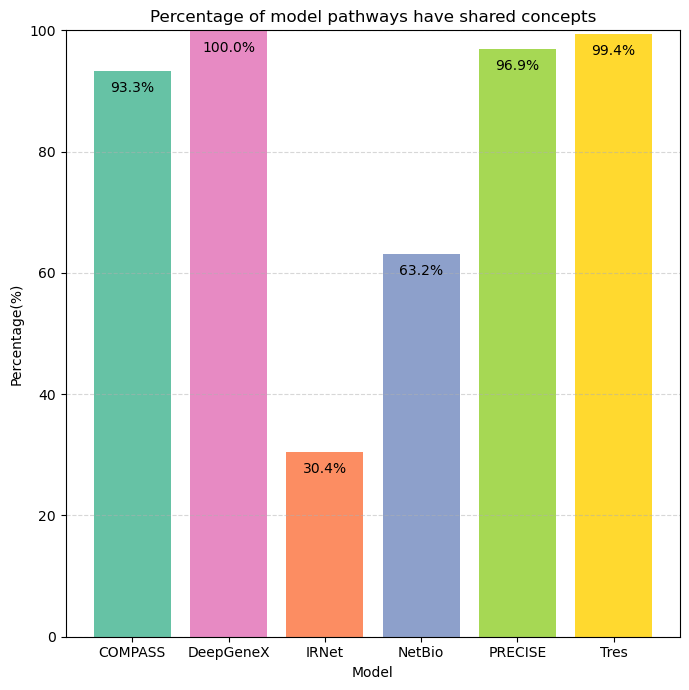

In [364]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate for each model:
# - total number of pathways for that model (value == "1")
# - number of those pathways that have a "concept" (non-empty or non-null concept field)

model_cols = ["COMPASS", "DeepGeneX", "IRNet", "NetBio", "PRECISE", "Tres"]
percentages = []

for model in model_cols:
    # Pathways in this model
    in_model = pathways_and_concepts_process[pathways_and_concepts_process[model] == "1"]
    total = len(in_model)
    # Count where concept assigned (not null, not empty, not whitespace)
    with_concept = in_model["concept"].dropna()
    with_concept = with_concept[with_concept.str.strip() != ""]
    n_with_concept = len(with_concept)
    # Percentage
    pct = (n_with_concept / total * 100) if total > 0 else 0
    percentages.append(pct)

# Define color mapping as specified (in order of model_cols)
model_colors = [
    "#66C2A5",  # COMPASS
    "#E78AC3",  # DeepGeneX
    "#FC8D62",  # IRNet
    "#8DA0CB",  # NetBio
    "#A6D854",  # PRECISE
    "#FFD92F",  # Tres
]

# Plot
plt.figure(figsize=(7, 7))
bars = plt.bar(model_cols, percentages, color=model_colors)
plt.ylim(0, 100)
plt.ylabel("Percentage(%)")
plt.xlabel("Model")
plt.title("Percentage of model pathways have shared concepts")
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, pct in enumerate(percentages):
    plt.text(i, pct-4, f"{pct:.1f}%", ha='center', va='bottom', fontsize=10)  # Lower the text by adjusting the y position (pct-4)
plt.tight_layout()
plt.savefig("percentage_of_model_pathways_have_shared_concepts.svg")
plt.show()


In [399]:
from upsetplot import from_memberships
# Calculate number of pathways for each combination of models

import itertools
import pandas as pd

# Columns corresponding to model names
model_cols = ["COMPASS", "DeepGeneX", "IRNet", "NetBio", "PRECISE", "Tres"]

# Calculate the number of pathways unique to combinations of models, recursively from 1 to all models

results = {}

# For each k = 1 to 6 (number of models)
for k in range(1, len(model_cols) + 1):
    results[k] = {}
    # For each combination of size k
    for models in itertools.combinations(model_cols, k):
        # Pathways with 1 in all these models...
        all_one = (pathways_and_concepts_process[list(models)] == "1").all(axis=1)
        # ...and 0 in all _other_ models
        mask = all_one
        if k < len(model_cols):
            other_models = [m for m in model_cols if m not in models]
            all_zero = (pathways_and_concepts_process[other_models] == "0").all(axis=1)
            mask = mask & all_zero
        count = mask.sum()
        # Store as tuple of model names
        results[k][models] = count

# Print results formatted
for k in range(1, len(model_cols) + 1):
    print(f"\nNumber of pathways present unique to *exactly* these {k} model(s):")
    for comb, count in results[k].items():
        if count > 0:
            print(f"{comb}: {count}")




Number of pathways present unique to *exactly* these 1 model(s):
('COMPASS',): 4
('DeepGeneX',): 10
('IRNet',): 23
('NetBio',): 38
('PRECISE',): 56
('Tres',): 290

Number of pathways present unique to *exactly* these 2 model(s):
('COMPASS', 'PRECISE'): 2
('COMPASS', 'Tres'): 9
('DeepGeneX', 'PRECISE'): 7
('PRECISE', 'Tres'): 28

Number of pathways present unique to *exactly* these 3 model(s):
('DeepGeneX', 'PRECISE', 'Tres'): 4

Number of pathways present unique to *exactly* these 4 model(s):

Number of pathways present unique to *exactly* these 5 model(s):

Number of pathways present unique to *exactly* these 6 model(s):


In [403]:
from upsetplot import from_memberships
# Calculate number of pathways for each combination of models

import itertools
import pandas as pd

# Columns corresponding to model names
model_cols = ["COMPASS", "DeepGeneX", "IRNet", "NetBio", "PRECISE", "Tres"]

# Calculate the number of pathways unique to combinations of models, recursively from 1 to all models

results_concepts = {}

# For each k = 1 to 6 (number of models)
for k in range(1, len(model_cols) + 1):
    results_concepts[k] = {}
    # For each combination of size k
    for models in itertools.combinations(model_cols, k):
        # Pathways with 1 in all these models...
        #print(models)
        all_one = (concepts_table[list(models)] == 1).all(axis=1)
        #print(all_one)
        # ...and 0 in all _other_ models
        mask = all_one
        if k < len(model_cols):
            other_models = [m for m in model_cols if m not in models]
            all_zero = (concepts_table[other_models] == 0).all(axis=1)
            mask = mask & all_zero
        count = mask.sum()
        # Store as tuple of model names
        results_concepts[k][models] = count
# Print the names of concepts for each combination (with count > 0)
for k in range(1, len(model_cols) + 1):
    print(f"\nConcept names present unique to *exactly* these {k} model(s):")
    for comb, count in results_concepts[k].items():
        if count > 0:
            # Mask for rows matching this exact combination
            all_one = (concepts_table[list(comb)] == 1).all(axis=1)
            if k < len(model_cols):
                other_models = [m for m in model_cols if m not in comb]
                all_zero = (concepts_table[other_models] == 0).all(axis=1)
                mask = all_one & all_zero
            else:
                mask = all_one
            concept_names = concepts_table.index[mask].tolist()
            print(f"{comb}: {count} concepts")
            for cn in concept_names:
                print(f"  - {cn}")

# Print results formatted
for k in range(1, len(model_cols) + 1):
    print(f"\nNumber of concepts present unique to *exactly* these {k} model(s):")
    for comb, count in results_concepts[k].items():
        if count > 0:
            print(f"{comb}: {count}")




Concept names present unique to *exactly* these 1 model(s):
('COMPASS',): 2 concepts
  - jak stat helicobacter
  - HEDGEHOG SIGNALING
('DeepGeneX',): 1 concepts
  - camkk2 pathway wp4874
('IRNet',): 19 concepts
  - PYRUVATE METABOLISM
  - NITROGEN METABOLISM
  - PROPANOATE METABOLISM
  - RNA DEGRADATION
  - pantothenate coa biosynthesis
  - metabolism enzymes caffeine
  - AMINOACYL-TRNA BIOSYNTHESIS
  - VITAMIN B6 METABOLISM
  - PYRIMIDINE METABOLISM
  - PROTEIN DIGESTION AND ABSORPTION
  - ARGININE BIOSYNTHESIS
  - PHOSPHONATE AND PHOSPHINATE METABOLISM
  - THIAMINE METABOLISM
  - histidine beta alanine
  - TAURINE AND HYPOTAURINE METABOLISM
  - GLYOXYLATE AND DICARBOXYLATE METABOLISM
  - PENTOSE PHOSPHATE PATHWAY
  - SULFUR METABOLISM
  - D-AMINO ACID METABOLISM
('NetBio',): 16 concepts
  - activate rocks paks
  - REACTOME_SPRY_REGULATION_OF_FGF_SIGNALING
  - lui pax8 fusion
  - WP_MIRNA_TARGETS_IN_ECM_AND_MEMBRANE_RECEPTORS
  - IIZUKA_LIVER_CANCER_PROGRESSION_G1_G2_DN
  - HOLLEMAN_

In [400]:
results_concepts


{1: {('COMPASS',): 2,
  ('DeepGeneX',): 1,
  ('IRNet',): 19,
  ('NetBio',): 16,
  ('PRECISE',): 5,
  ('Tres',): 5},
 2: {('COMPASS', 'DeepGeneX'): 0,
  ('COMPASS', 'IRNet'): 0,
  ('COMPASS', 'NetBio'): 0,
  ('COMPASS', 'PRECISE'): 1,
  ('COMPASS', 'Tres'): 1,
  ('DeepGeneX', 'IRNet'): 0,
  ('DeepGeneX', 'NetBio'): 0,
  ('DeepGeneX', 'PRECISE'): 3,
  ('DeepGeneX', 'Tres'): 0,
  ('IRNet', 'NetBio'): 0,
  ('IRNet', 'PRECISE'): 0,
  ('IRNet', 'Tres'): 0,
  ('NetBio', 'PRECISE'): 0,
  ('NetBio', 'Tres'): 3,
  ('PRECISE', 'Tres'): 4},
 3: {('COMPASS', 'DeepGeneX', 'IRNet'): 0,
  ('COMPASS', 'DeepGeneX', 'NetBio'): 0,
  ('COMPASS', 'DeepGeneX', 'PRECISE'): 0,
  ('COMPASS', 'DeepGeneX', 'Tres'): 0,
  ('COMPASS', 'IRNet', 'NetBio'): 0,
  ('COMPASS', 'IRNet', 'PRECISE'): 0,
  ('COMPASS', 'IRNet', 'Tres'): 0,
  ('COMPASS', 'NetBio', 'PRECISE'): 1,
  ('COMPASS', 'NetBio', 'Tres'): 0,
  ('COMPASS', 'PRECISE', 'Tres'): 1,
  ('DeepGeneX', 'IRNet', 'NetBio'): 0,
  ('DeepGeneX', 'IRNet', 'PRECISE'): 0,

In [393]:
results_concepts

{}

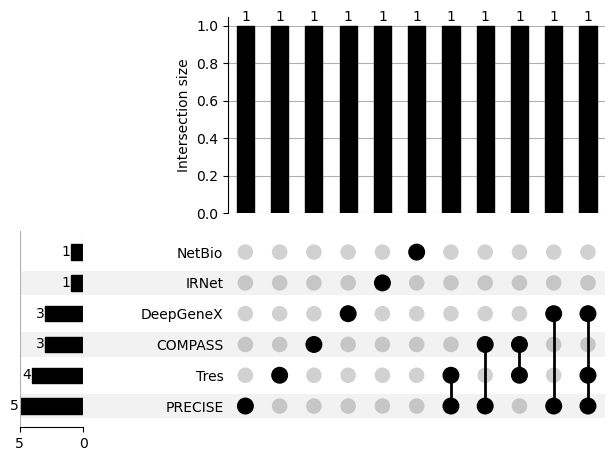

In [329]:
# Create a membership list for each set of pathways
from upsetplot import from_memberships, from_indicators
from upsetplot import UpSet

memberships = []
counts = []

for k in results:
    for models_tuple, count in results[k].items():
        if count > 0:
            memberships.append(models_tuple)
            counts.append(count)

# Create the UpSet input Series
upset_input = from_memberships(memberships, data=counts)

upset = UpSet(upset_input, subset_size="count", show_counts=True)
upset.plot()
plt.show()

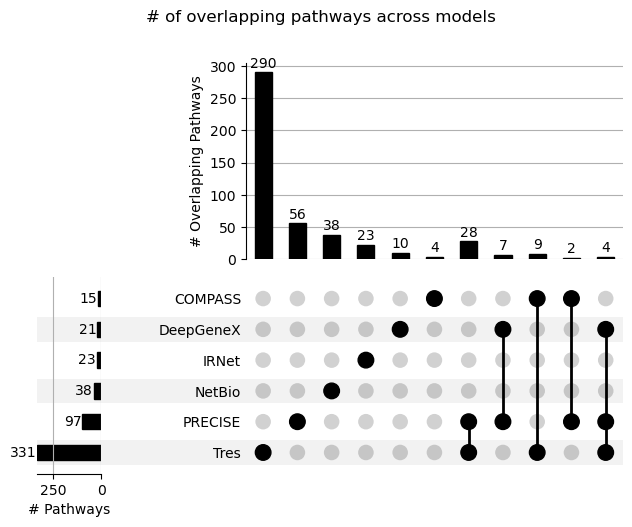

In [335]:
from upsetplot import plot
plot_result = plot(upset_input, show_counts=True)  
plot_result["intersections"].set_ylabel("# Overlapping Pathways")
plot_result["totals"].set_xlabel("# Pathways")

plt.suptitle("# of overlapping pathways across models")

plt.savefig("upset_plot.svg")
#plt.show()  


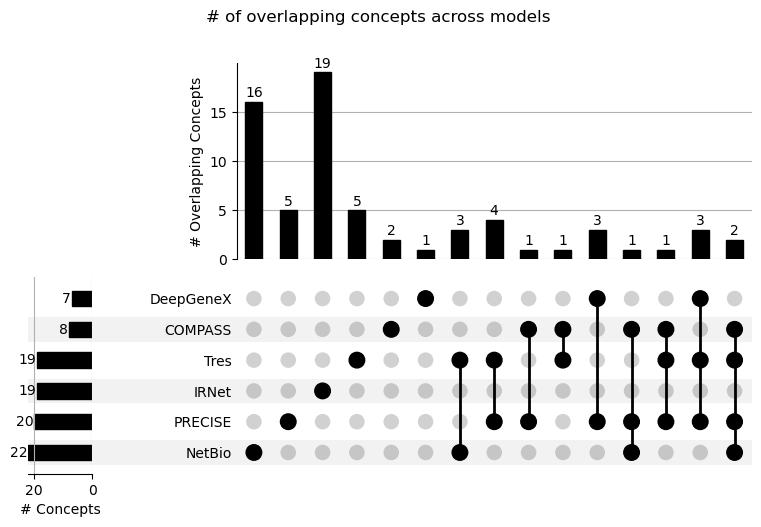

In [402]:
memberships_concepts = []
counts_concepts = []

for k in results_concepts:
    for models_tuple, count in results_concepts[k].items():
        if count > 0:
            memberships_concepts.append(models_tuple)
            counts_concepts.append(count)

# Create the UpSet input Series
upset_input_concepts = from_memberships(memberships_concepts, data=counts_concepts)

from upsetplot import plot
plot_result = plot(upset_input_concepts, show_counts=True)  
plot_result["intersections"].set_ylabel("# Overlapping Concepts")
plot_result["totals"].set_xlabel("# Concepts")

plt.suptitle("# of overlapping concepts across models")

plt.savefig("upset_plot_concepts.svg")
plt.show()  


In [313]:
upset_input

COMPASS  DeepGeneX  IRNet  NetBio  PRECISE  Tres 
True     False      False  False   False    False      4
False    True       False  False   False    False     10
         False      True   False   False    False     23
                    False  True    False    False     38
                           False   True     False     56
                                   False    True     290
True     False      False  False   True     False      2
                                   False    True       9
False    True       False  False   True     False      7
         False      False  False   True     True      28
         True       False  False   True     True       4
dtype: int64